# Part 1 - Drug Efficacy Heterogeneity Study using Coefficients of PK/PD

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 11:38:48 2020

@author: harshparikh
"""
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def set_ds(data,col_y,max_depth=2):
    data_prime = data.copy(deep=True)
    data_prime = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders',col_y]].dropna()
    Y = data_prime[col_y]
    X = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders']]
    model = tree.DecisionTreeRegressor(max_depth=max_depth,min_samples_split=10,min_samples_leaf=8).fit(X,Y)
    print(model.score(X,Y))
    return X,Y,model

In [3]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv',index_col=0)
data.head()

cluster    alpha0  alpha[1]  theta[1]  theta[2]  theta[3]  theta[4]  \
SID                                                                          
sid2         5  0.311404  0.243438 -0.082542 -0.016406  0.007245  0.003303   
sid8         5  1.211867  0.170145 -0.082542 -0.016406  0.007245  0.003303   
sid13        5  0.669065  0.228883 -0.082542 -0.016406  0.007245  0.003303   
sid17        5 -0.645282  0.381436 -0.082542 -0.016406  0.007245  0.003303   
sid18        4  2.849906  0.145905 -0.082542 -0.016406  0.007245  0.003303   

       theta[5]  theta[6]  sigma_err  ...  iGCS-Total  iGCS = T?  iGCS-E  \
SID                                   ...                                  
sid2  -0.001077 -0.002507   2.787910  ...         7.0        0.0     1.0   
sid8  -0.001077 -0.002507   2.787910  ...        12.0        0.0     4.0   
sid13 -0.001077 -0.002507   2.787910  ...        10.0        0.0     4.0   
sid17 -0.001077 -0.002507   2.787910  ...         8.0        0.0     1.0   
sid18 -0.001077 -0.002507   2.583988  ...         4.0        1.0     2.0   

       iGCS-V  iGCS-M  Worst GCS in 1st 24  Worst GCS Intubation status  \
SID                                                                       
sid2      2.0     4.0                  3.0                          1.0   
sid8      2.0     6.0                 11.0                          0.0   
sid13     1.0     5.0                  3.0                          1.0   
sid17     2.0     5.0                  8.0                          0.0   
sid18     1.0     1.0                  4.0                          1.0   

       iGCS actual scores  neuro_dx_Seizures/status epilepticus  \
SID                                                               
sid2                  3.0                                   0.0   
sid8                 12.0                                   1.0   
sid13                10.0                                   1.0   
sid17                 8.0                                   0.0   
sid18                 4.0                                   1.0   

       prim_dx_Respiratory disorders  
SID                                   
sid2                             1.0  
sid8                             0.0  
sid13                            0.0  
sid17                            0.0  
sid18                            0.0  

[5 rows x 52 columns]

In [4]:
col_y = 'alpha0'
X,Y,model = set_ds(data,col_y,max_depth=3)

0.11900694678182511


In [4]:
X.columns

Index(['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGC

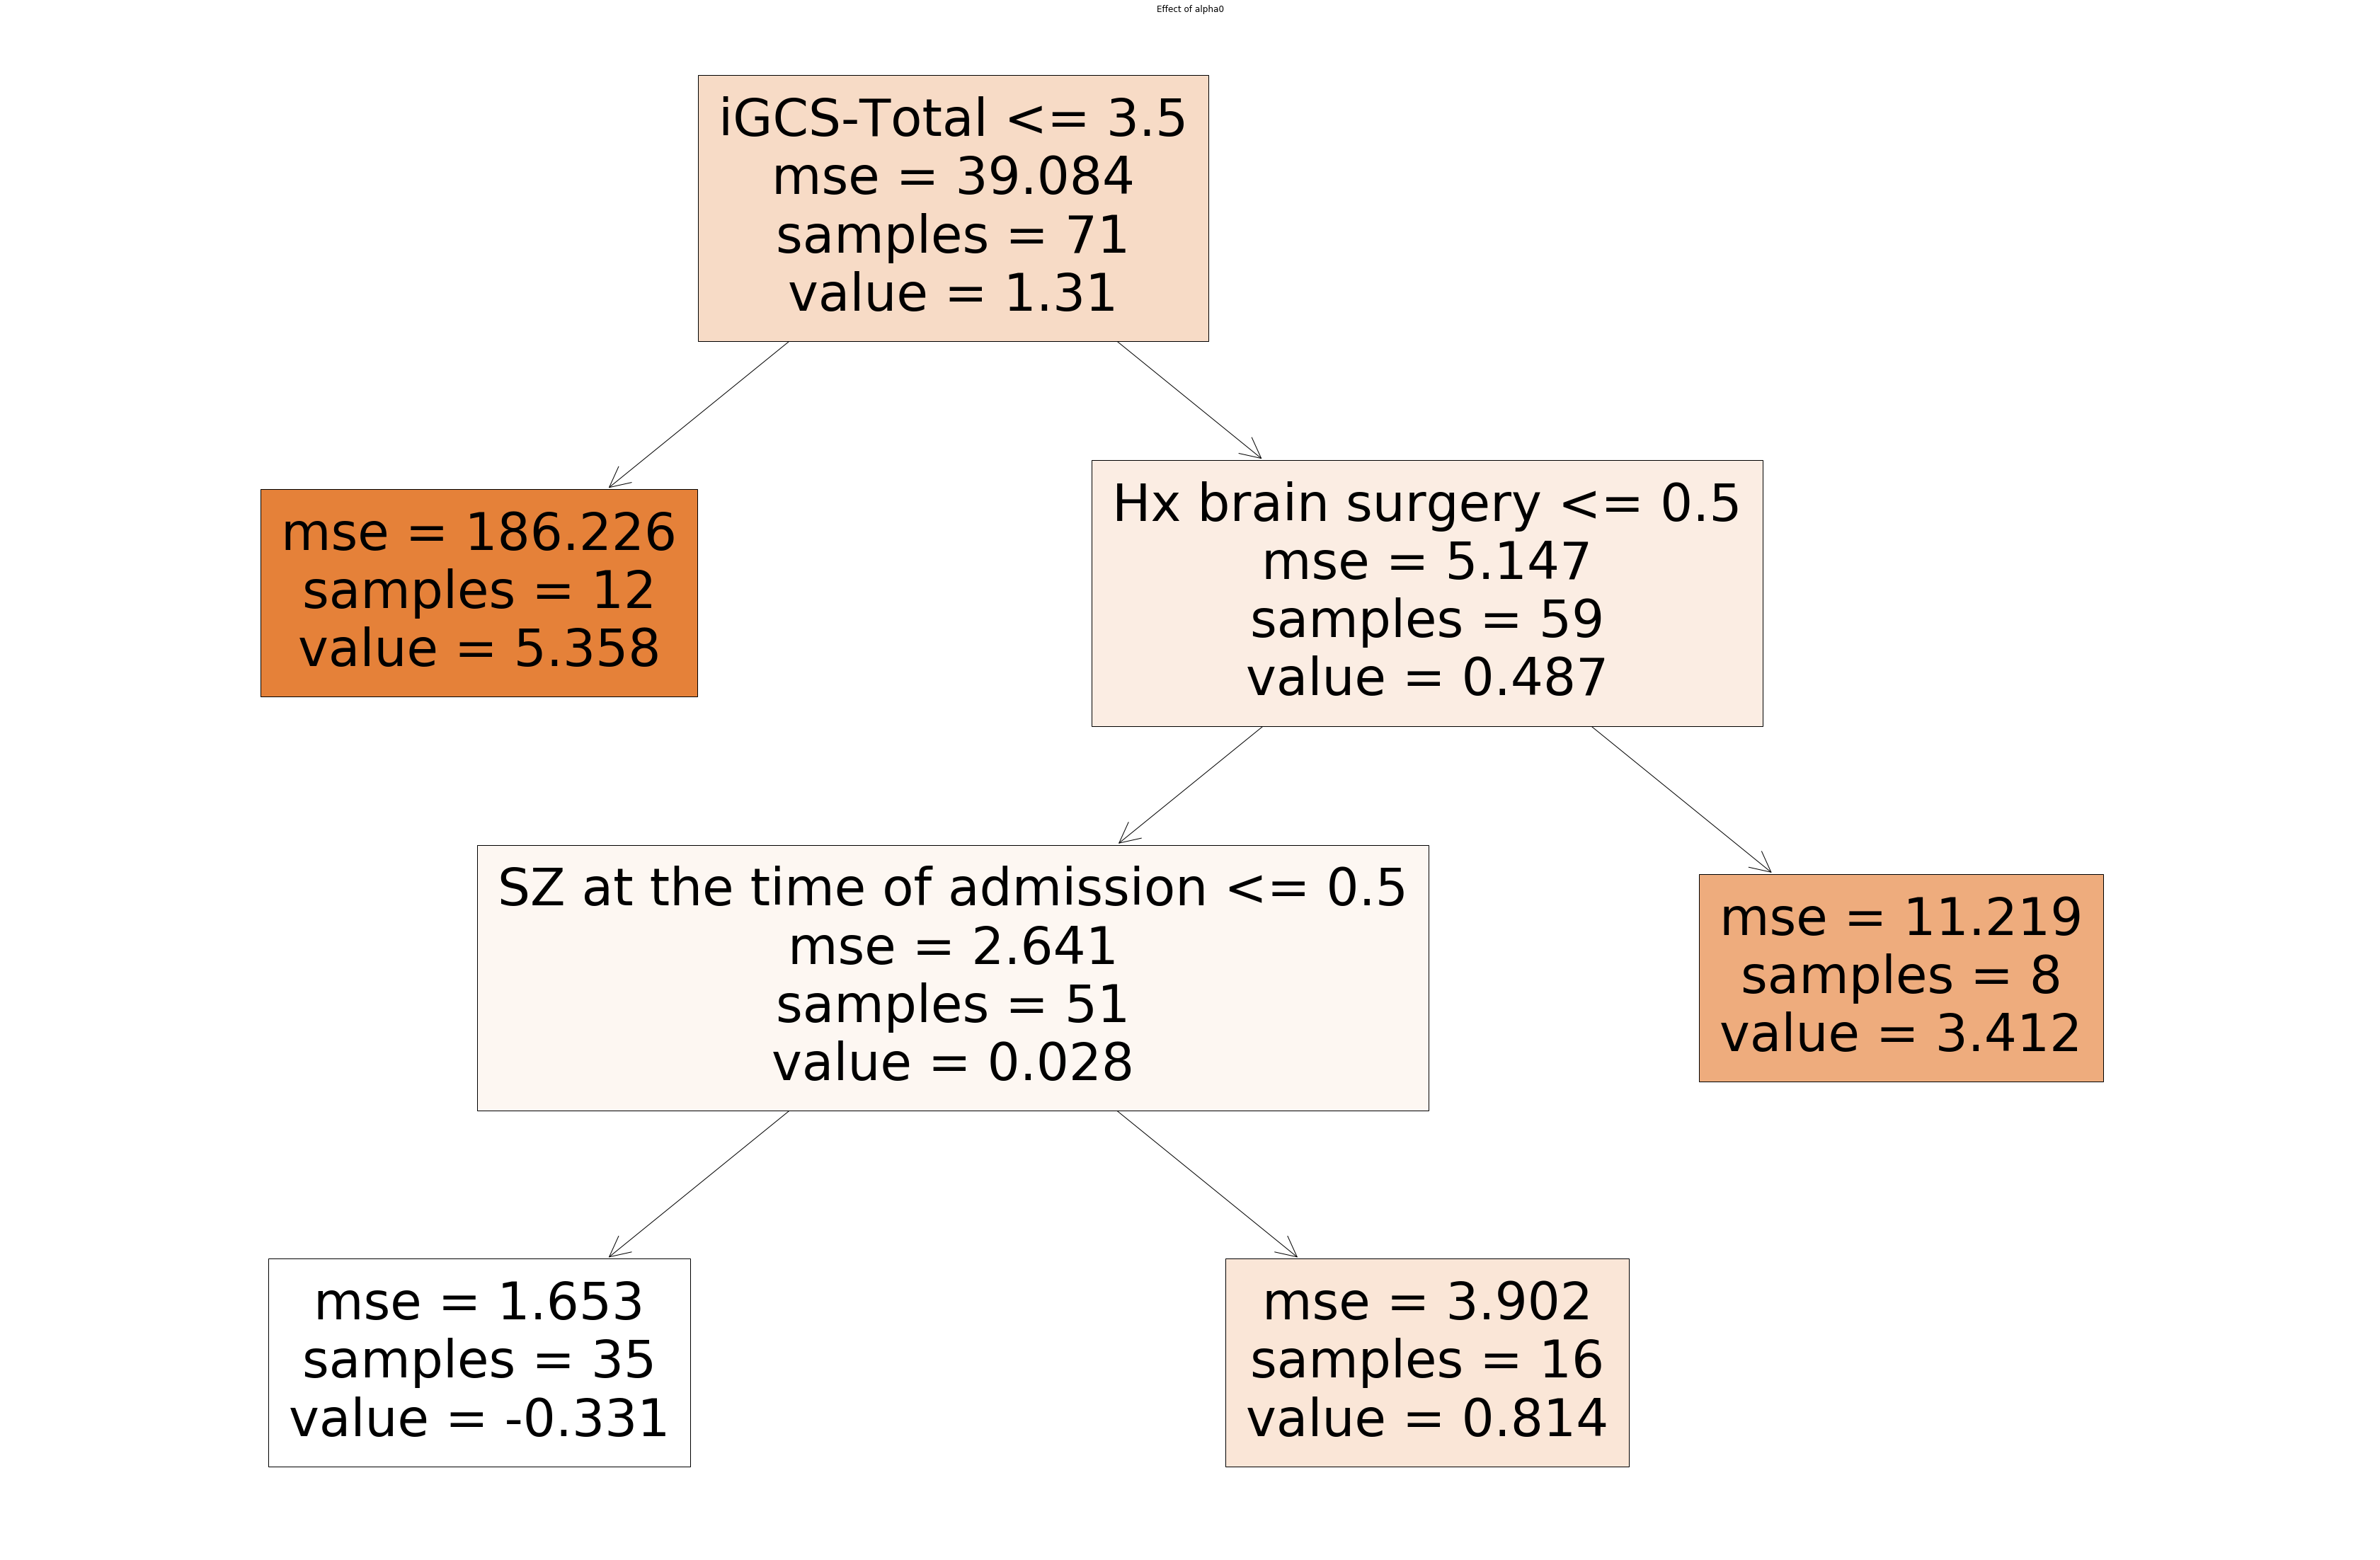

In [6]:
fig,ax = plt.subplots(figsize=(60,40))
tree.plot_tree(model,ax=ax,
               feature_names=['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at the time of admission',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
       'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
       'Worst GCS Intubation status', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders'],filled = True)
plt.title('Effect of %s'%(col_y))
fig.savefig('importance_tree_%s.png'%(col_y))

In [50]:
X.shape

(71, 36)

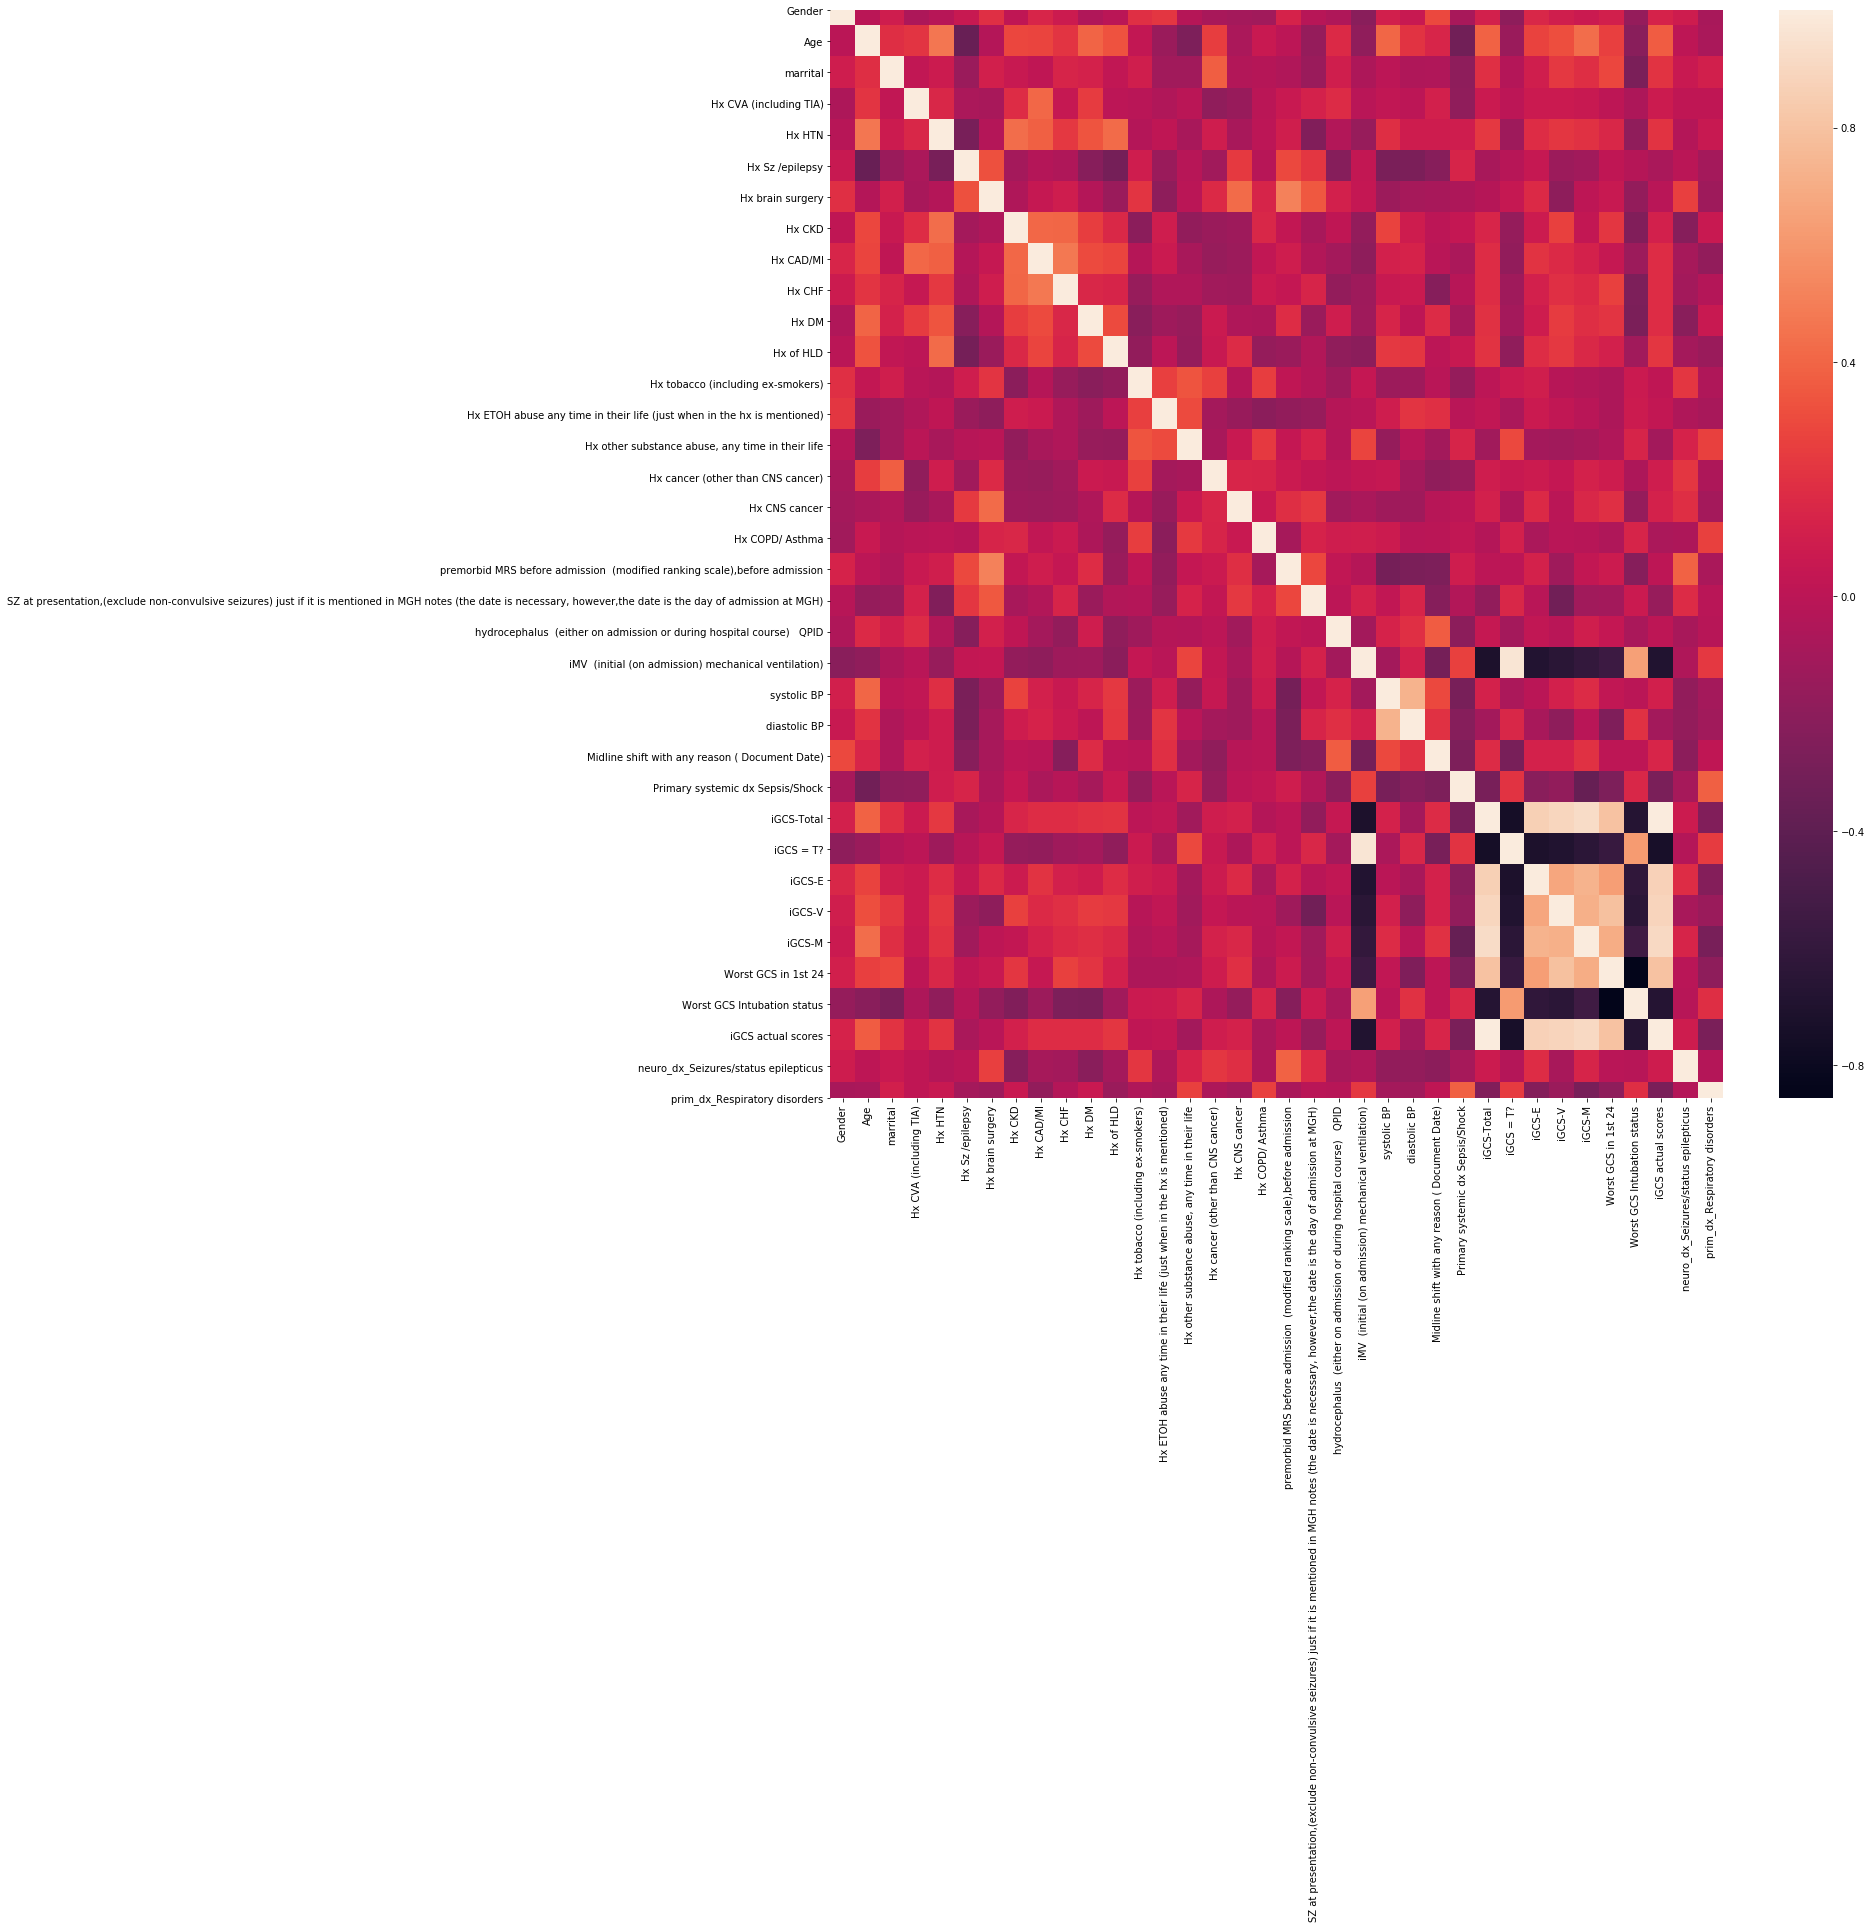

In [7]:
C_correlation = np.corrcoef(X,rowvar=False)
fig = plt.figure(figsize=(20,20))
sns.heatmap(C_correlation)
plt.xticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=90)
plt.yticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=0)
fig.savefig('correlation_c.png')

# Part 2 - Observational Study for Efficacy of Drugs

Let's start with studying the efficacy of Midazolam

### Reading Patients' Data


In [169]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm

data_dir = '/Users/harshparikh/IIC/step1_output/'

In [170]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

Gender    Age  marrital  APACHE II  first 24  Hx CVA (including TIA)  \
Index                                                                          
sid36        0  73.84       0.0                  NaN                     0.0   
sid39        0  70.77       0.0                  NaN                     1.0   
sid56        1  82.84       0.0                  NaN                     1.0   
sid297       0  58.95       1.0                  NaN                     1.0   
sid327       0  45.47       1.0                  NaN                     0.0   

        Hx HTN  Hx Sz /epilepsy  Hx brain surgery  Hx CKD  Hx CAD/MI  ...  \
Index                                                                 ...   
sid36      0.0              0.0               0.0     0.0        0.0  ...   
sid39      1.0              1.0               0.0     0.0        0.0  ...   
sid56      0.0              1.0               0.0     0.0        1.0  ...   
sid297     1.0              1.0               0.0     1.0        1.0  ...   
sid327     0.0              0.0               0.0     0.0        0.0  ...   

        iGCS-Total  iGCS = T?  iGCS-E  iGCS-V  iGCS-M  Worst GCS in 1st 24  \
Index                                                                        
sid36            9          0       4       1       4                    3   
sid39            9          0       4       1       4                    9   
sid56           12          0       4       3       5                    3   
sid297          15          0       4       5       6                   15   
sid327           7          1       1       1       5                    7   

        Worst GCS Intubation status  iGCS actual scores  \
Index                                                     
sid36                             1                   9   
sid39                             0                   9   
sid56                             1                  12   
sid297                            0                  15   
sid327                            1                   7   

        neuro_dx_Seizures/status epilepticus  prim_dx_Respiratory disorders  
Index                                                                        
sid36                                      0                              0  
sid39                                      1                              0  
sid56                                      1                              0  
sid297                                     0                              0  
sid327                                     1                              0  

[5 rows x 37 columns]

In [171]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

DC MRS (modified ranking scale)  \
Index                                     
sid36                                 4   
sid39                                 4   
sid56                                 5   
sid297                                3   
sid327                                6   

        DC GOSE (extended glasgow outcome scale)  \
Index                                              
sid36                                        3.0   
sid39                                        3.0   
sid56                                        3.0   
sid297                                       4.0   
sid327                                       1.0   

        DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5  
Index                                                          
sid36                                                 2.0      
sid39                                                 2.0      
sid56                                                 2.0      
sid297                                                1.0      
sid327                                                5.0

In [172]:
def get_pk_k():
    halflife = pd.DataFrame({
        'lacosamide':[13],
        'levetiracetam':[6],
        'midazolam':[1.5],
        'pentobarbital':[15],
        'phenobarbital':[53],
        'phenytoin':[22],
        'propofol':[1.5],
        'valproate':[8]
        },index=['t1/2'])
    halflife = halflife.append(np.log(2) / halflife.rename(index={'t1/2':'k'}))
    PK_K = halflife.loc['k']
    return PK_K
    
def drug_concentration(d_ts,k):
    """
    d_ts.shape = (#drug, T)
    """
    k_ts = np.array([ np.exp(-k*t) for t in range(d_ts.shape[1]) ]).T
    conc = np.array([np.convolve(d_ts[i],k_ts[i],'full') for i in range(d_ts.shape[0])])
    conc = conc[:,:d_ts.shape[1]]
    return conc


# # data functions


def patient(path, W):
    window = W
    step   = W
    
    #if '.mat' in path:
    mat = sio.loadmat(path)
    human_iic = mat['human_iic'].flatten().astype(float)
    spike = mat['spike'].flatten().astype(float)
    drugs = mat['drugs_weightnormalized'].astype(float)
    artifact = mat['artifact'].flatten().astype(float)
    freq = mat['spec_freq'].flatten().astype(float)
    spec = mat['spec'].astype(float)
    human_iic[artifact==1] = np.nan
    spike[artifact==1] = np.nan

    drugnames = list(map(lambda x: x.strip(), mat['Dnames']))
    drugs_window = np.array([ np.mean(drugs[i:i+window],axis=0) for i in range(0,len(drugs),step) ])

    sz_burden = (human_iic==1).astype(float)
    sz_burden[np.isnan(human_iic)] = np.nan
    sz_burden_window = np.array([np.nanmean(sz_burden[i:i+window]) for i in range(0, len(sz_burden),step)])

    iic_burden = np.in1d(human_iic, [1,2,3,4]).astype(float)
    iic_burden[np.isnan(human_iic)] = np.nan
    iic_burden_window = np.array([np.nanmean(iic_burden[i:i+window]) for i in range(0, len(iic_burden),step)])

    spike_rate_window = np.array([np.nanmean(spike[i:i+window]) for i in range(0, len(spike),step)])

    spec_window = np.array([np.nanmean(spec[i:i+window], axis=0) for i in range(0, len(spec),step)])
    
    res = {'sz_burden': sz_burden_window,
           'iic_burden': iic_burden_window,
           'spike_rate': spike_rate_window,
           'spec': spec_window,
           'freq': freq}
    for i, dn in enumerate(drugnames):
        res[dn] = drugs_window[:,i]
    return res


# In[6]:


def preprocess(sid, data_dir, PK_K, W, drugs_tostudy):  # previsously called patient_data

    #fetch the data
    p = patient(os.path.join(data_dir, sid + '.mat'), W)

    #setting up the data
    response_tostudy = 'iic_burden'
    Pobs = p[response_tostudy]

    #PK
    Ddose = np.array([p[x] for x in drugs_tostudy])
    D = drug_concentration(Ddose, PK_K[drugs_tostudy].values).T

    #cov_tostudy = ['Age']
    C = pd.read_csv(os.path.join(data_dir, 'covariates.csv'))
    Cname = list(C.columns)
    C = C[C.Index==sid].iloc[0]#[cov_tostudy]
    
    return Pobs, response_tostudy, D, drugs_tostudy, C, Cname, p['spec'], p['freq']


In [173]:
patients = {}

sids = ['sid2', 'sid8', 'sid13', 'sid17', 'sid18', 'sid30', 'sid36', 'sid39', 'sid54',
        'sid56', 'sid69', 'sid77', 'sid82', 'sid88', 'sid91', 'sid92', 'sid297', 'sid327',
        'sid385', 'sid395', 'sid400', 'sid403', 'sid406', 'sid424', 'sid450', 'sid456',
        'sid490', 'sid512', 'sid551', 'sid557', 'sid734', 'sid736', 'sid801', 'sid821',
        'sid824', 'sid827', 'sid832', 'sid833', 'sid834', 'sid839', 'sid848', 'sid849',
        'sid852', 'sid872', 'sid876', 'sid880', 'sid881', 'sid884', 'sid886',
        'sid915', 'sid940', 'sid942', 'sid944', 'sid952', 'sid960', 'sid965', 'sid967',
        'sid983', 'sid987', 'sid988', 'sid994', 'sid1002', 'sid1006', 'sid1016', 'sid1022',
        'sid1025', 'sid1034', 'sid1038', 'sid1039', 'sid1055', 'sid1056', 'sid1063', 'sid1113',
        'sid1116', 'sid1337', 'sid1913', 'sid1915', 'sid1916', 'sid1917', 'sid1928', 'sid1956', 'sid1966']

drugs_tostudy = ['lacosamide', 'levetiracetam', 'midazolam','propofol', 'valproate']
    
PK_K = get_pk_k()

W = 300
Pobs = {}
D = {}
# spec = []
# freq = []
for sid in tqdm.tqdm(sids):
    Pobs_, Pname, D_, Dname, C_, Cname, spec_, freq_ = preprocess(sid, data_dir, PK_K, W, drugs_tostudy)
    Pobs_ = pd.DataFrame(Pobs_.reshape(-1,1),columns=[Pname])
    D_ = pd.DataFrame(D_,columns=Dname)
    Pobs[sid] = Pobs_
    D[sid] = D_

100%|██████████| 82/82 [00:22<00:00,  3.69it/s]


In [174]:
covariates.loc[sids].head()

Gender    Age  marrital  APACHE II  first 24  Hx CVA (including TIA)  \
Index                                                                         
sid2        0  85.01       0.0                  NaN                     0.0   
sid8        0  67.24       0.0                  NaN                     0.0   
sid13       0  48.12       0.0                  NaN                     0.0   
sid17       0  35.03       0.0                  NaN                     0.0   
sid18       1  60.20       0.0                  NaN                     0.0   

       Hx HTN  Hx Sz /epilepsy  Hx brain surgery  Hx CKD  Hx CAD/MI  ...  \
Index                                                                ...   
sid2      1.0              0.0               0.0     1.0        0.0  ...   
sid8      1.0              0.0               0.0     0.0        0.0  ...   
sid13     0.0              0.0               0.0     0.0        0.0  ...   
sid17     0.0              1.0               0.0     0.0        0.0  ...   
sid18     1.0              1.0               1.0     0.0        0.0  ...   

       iGCS-Total  iGCS = T?  iGCS-E  iGCS-V  iGCS-M  Worst GCS in 1st 24  \
Index                                                                       
sid2            7          0       1       2       4                    3   
sid8           12          0       4       2       6                   11   
sid13          10          0       4       1       5                    3   
sid17           8          0       1       2       5                    8   
sid18           4          1       2       1       1                    4   

       Worst GCS Intubation status  iGCS actual scores  \
Index                                                    
sid2                             1                   3   
sid8                             0                  12   
sid13                            1                  10   
sid17                            0                   8   
sid18                            1                   4   

       neuro_dx_Seizures/status epilepticus  prim_dx_Respiratory disorders  
Index                                                                       
sid2                                      0                              1  
sid8                                      1                              0  
sid13                                     1                              0  
sid17                                     0                              0  
sid18                                     1                              0  

[5 rows x 37 columns]

In [175]:
outcomes.loc[sids].head()

DC MRS (modified ranking scale)  \
Index                                    
sid2                                 5   
sid8                                 4   
sid13                                5   
sid17                                6   
sid18                                5   

       DC GOSE (extended glasgow outcome scale)  \
Index                                             
sid2                                        2.0   
sid8                                        4.0   
sid13                                       2.0   
sid17                                       1.0   
sid18                                       2.0   

       DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5  
Index                                                         
sid2                                                 4.0      
sid8                                                 2.0      
sid13                                                2.0      
sid17                                                5.0      
sid18                                                2.0

In [176]:
def intervention_information(Pobs,D,sids,f=6):
    Pobs_pre, intervention, outcome, time_of_int = {}, {}, {}, {}
    for sid in sids:
        t = np.min(D[sid].loc[D[sid].sum(axis=1) > 0].index)
        Pobs_pre[sid] = Pobs[sid].loc[:t]['iic_burden']
        intervention[sid] = D[sid].loc[t]
        outcome[sid] = Pobs[sid].loc[t:t+f]['iic_burden'].to_numpy()
        time_of_int[sid] = t
    return pd.DataFrame.from_dict(Pobs_pre,orient='index'), pd.DataFrame.from_dict(intervention,orient='index'), pd.DataFrame.from_dict(outcome,orient='index'), pd.DataFrame.from_dict(time_of_int,orient='index')

In [177]:
f=12
Pobs_pre, intervention, short_term_outcome, time_of_int = intervention_information(Pobs,D,sids,f)

In [178]:
distance = lambda x,y: np.linalg.norm(x-y)
def neighbors(x,S,k=1):
    d_array = list( map( lambda y: distance(x,y), S.to_numpy() ) )
    kneighbor = S.index[np.argpartition(d_array, k)[:k]]
    return kneighbor

In [179]:
Sc = Pobs_pre.loc[intervention['midazolam']==0].max(axis=1)
St = Pobs_pre.loc[intervention['midazolam']>0].max(axis=1)

  9%|▊         | 7/82 [00:01<00:16,  4.57it/s]

sid30


100%|██████████| 82/82 [00:05<00:00, 15.47it/s]


(-1, 1)

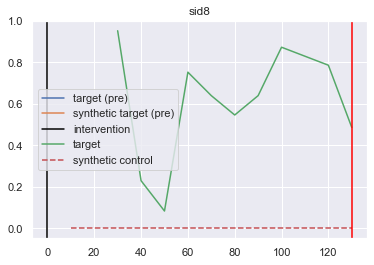

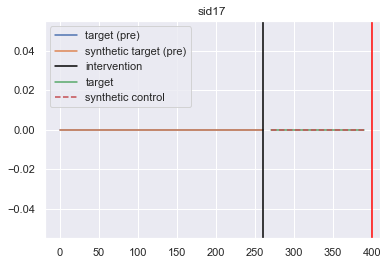

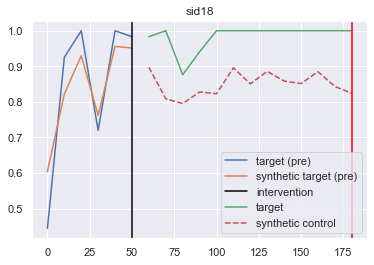

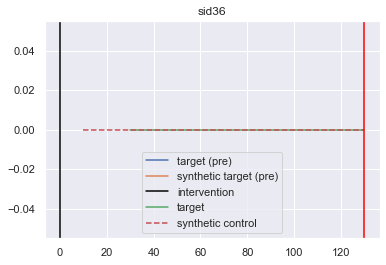

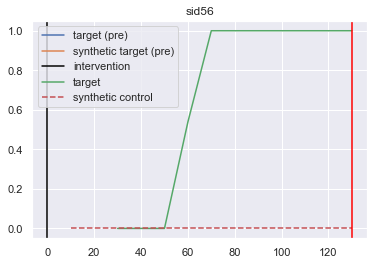

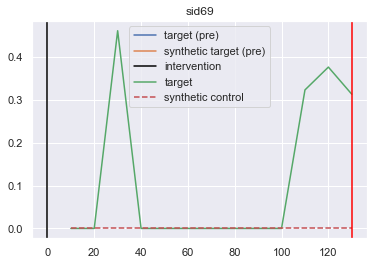

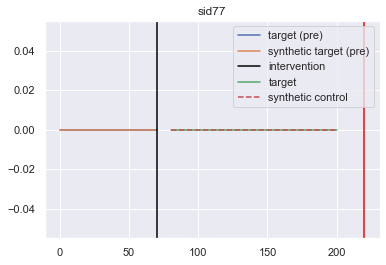

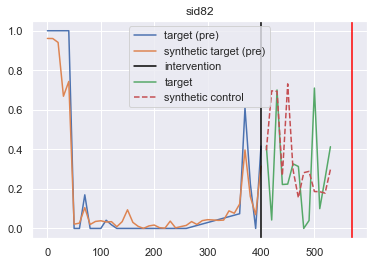

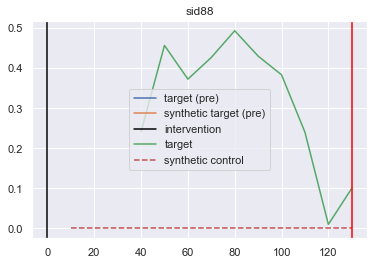

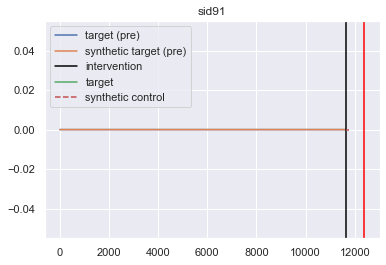

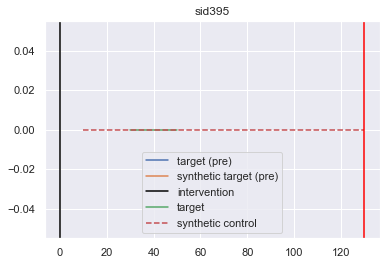

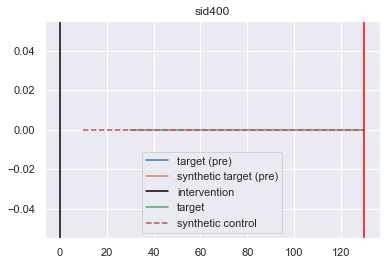

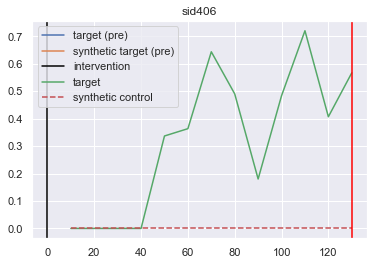

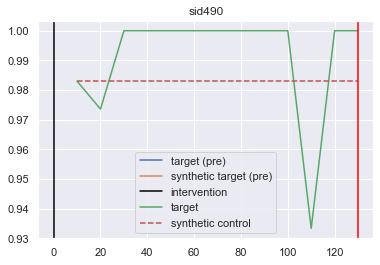

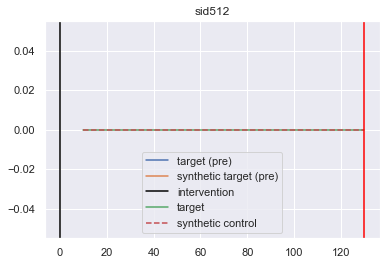

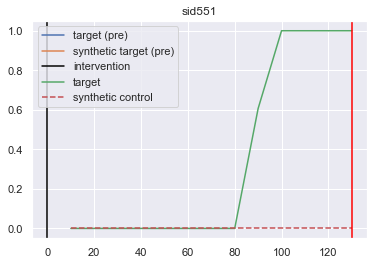

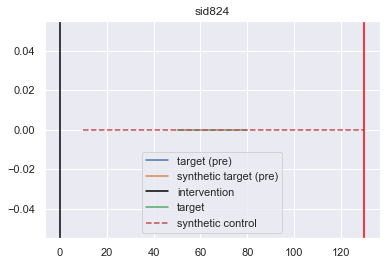

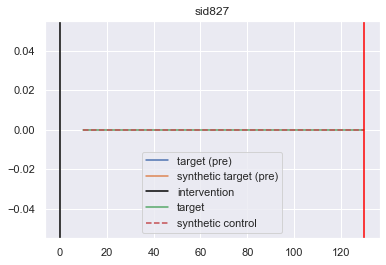

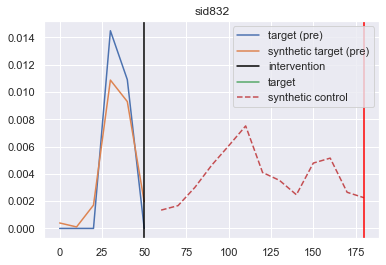

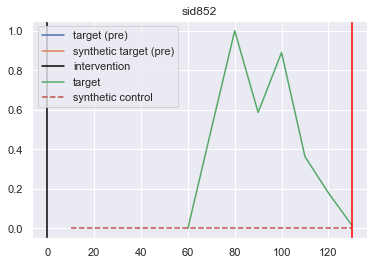

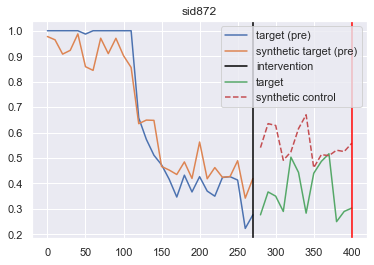

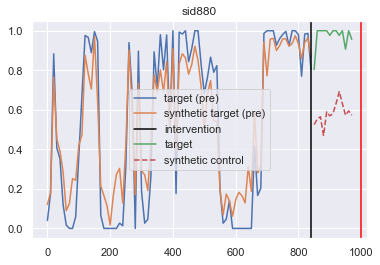

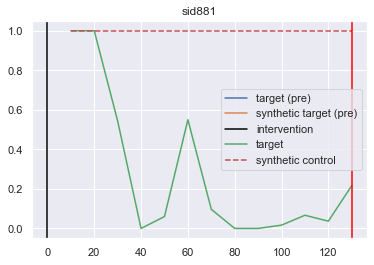

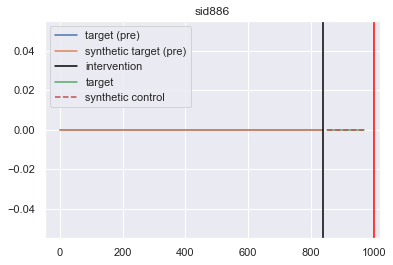

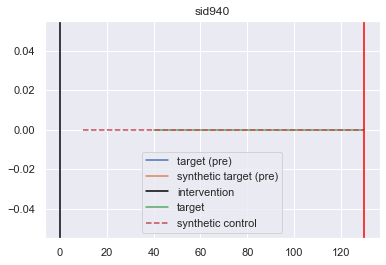

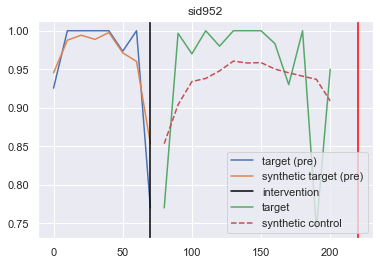

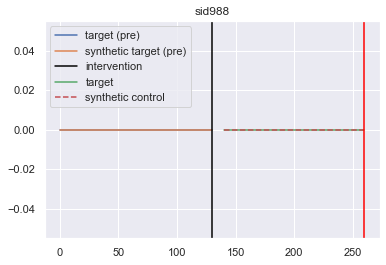

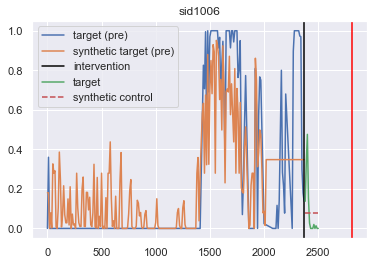

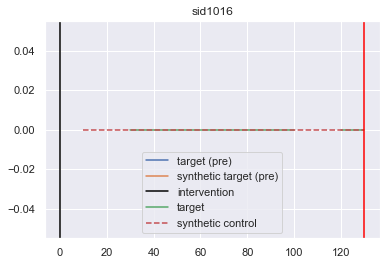

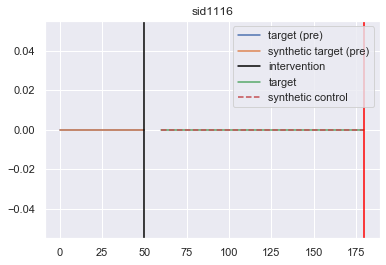

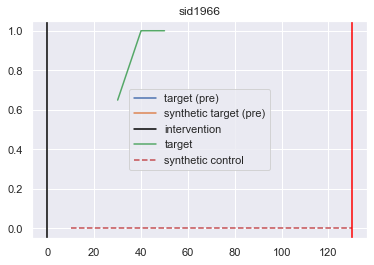

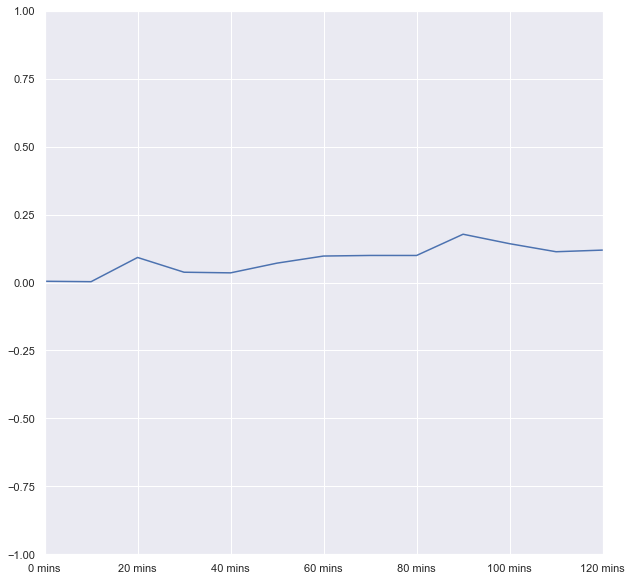

In [182]:
#Synthetic Control
T = intervention['propofol']>0
TE_propofol = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = lm.Ridge().fit(x0,x) x = \sum_j w_j x0_j 
            model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_propofol.append(y1-y0_predict)
        except:
            print(sid)
TE_propofol_df = pd.DataFrame(TE_propofol).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
fig=plt.figure(figsize=(10,10))
TE_propofol_df.mean(axis=0).plot()
plt.ylim((-1,1))

100%|██████████| 82/82 [00:00<00:00, 106.31it/s]


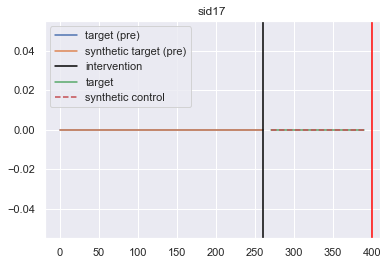

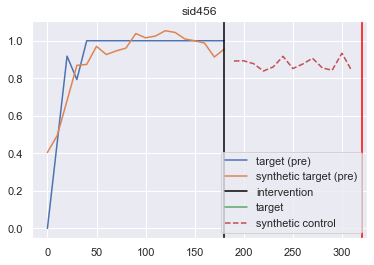

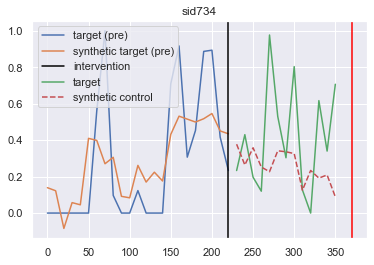

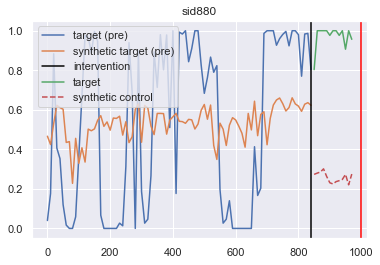

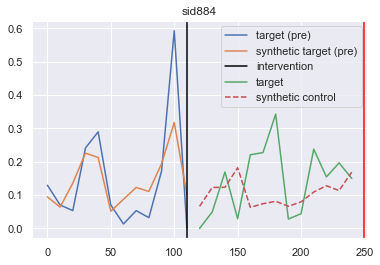

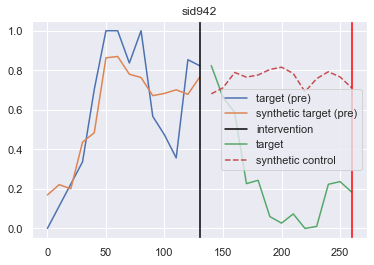

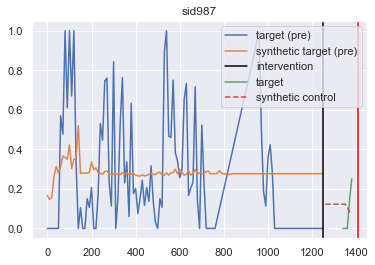

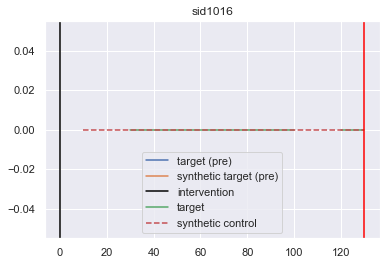

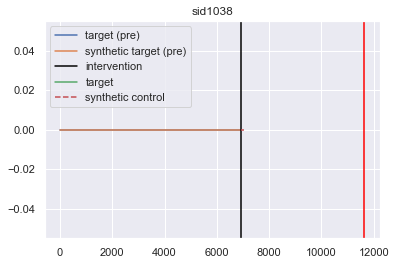

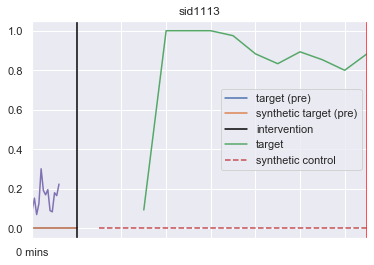

In [14]:
#Synthetic Control
sns.set()
T = intervention['midazolam']>0
TE_midazolam = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids[:]):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T 
        #for a control unit, the time of first intervention has to be after (f+time of first intervention for unit i)
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = ensemble.AdaBoostRegressor().fit(x0,x)
            model = lm.Ridge().fit(x0,x) # x = \sum_j w_j x0_j --> I found this w_j
#             model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0) #syn_y0 = \sum_j w_j y0_j
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_midazolam.append(y1-y0_predict)
            
        except:
            print(sid)
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()

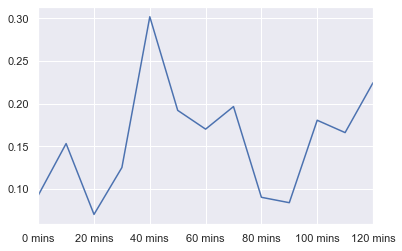

In [15]:
TE_midazolam_df.mean(axis=0).plot() #average(y1 - y0) : negative means drug is working as expected, positive is weird

100%|██████████| 82/82 [00:01<00:00, 60.10it/s]


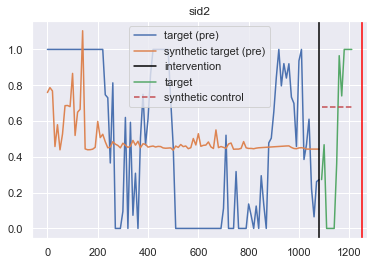

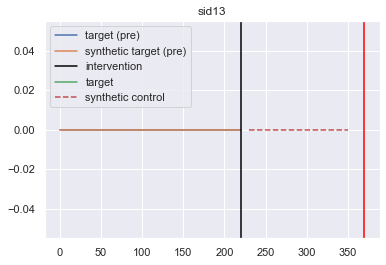

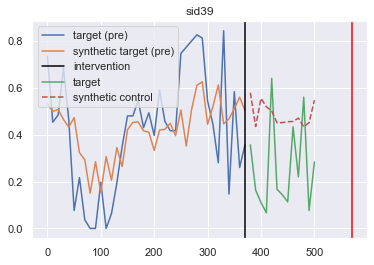

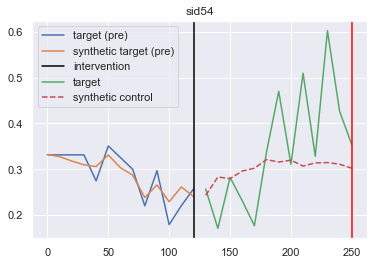

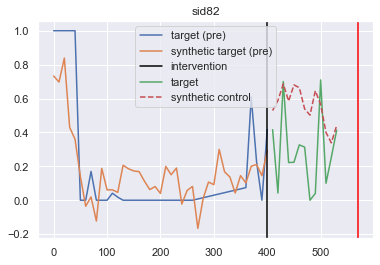

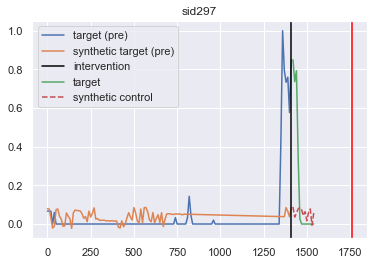

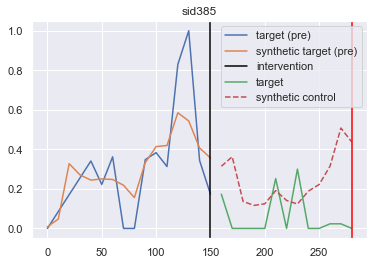

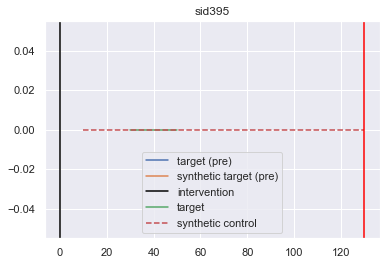

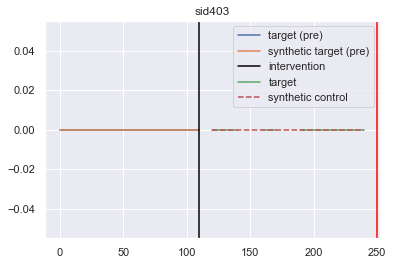

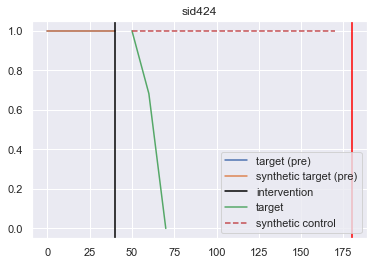

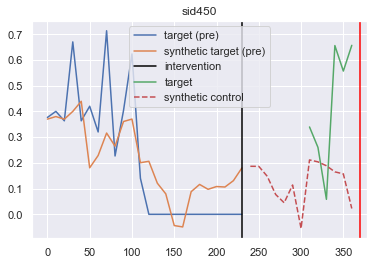

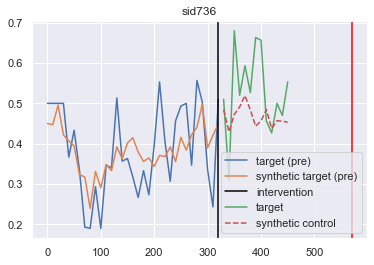

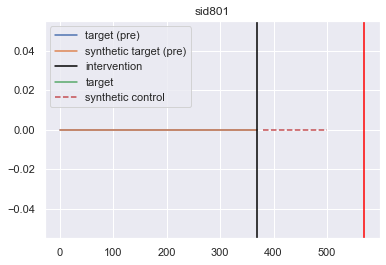

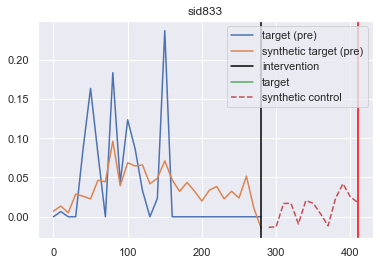

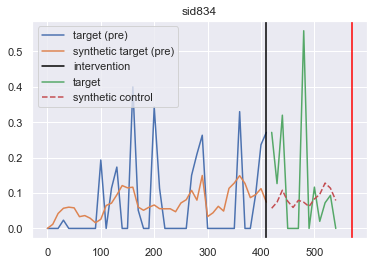

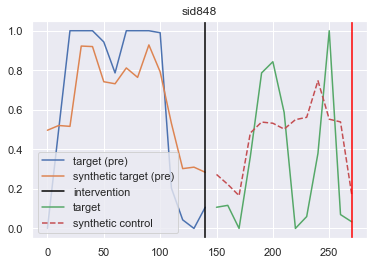

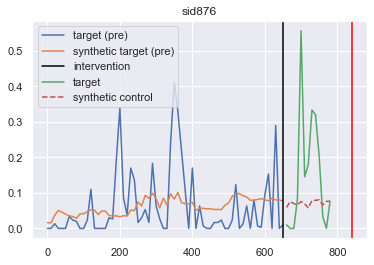

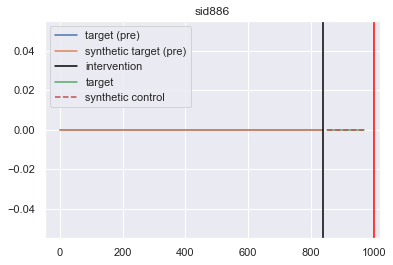

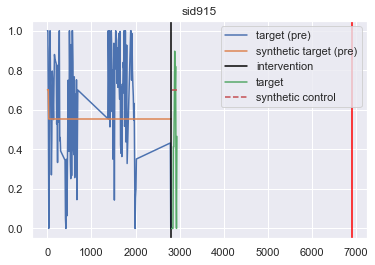

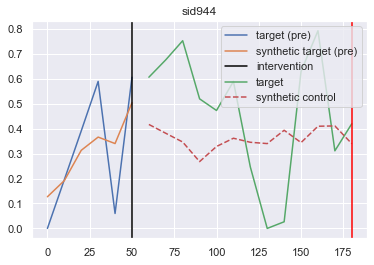

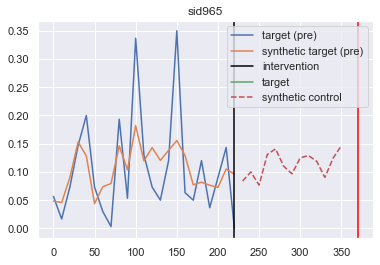

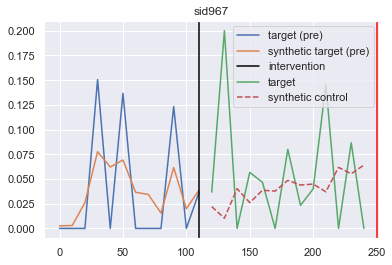

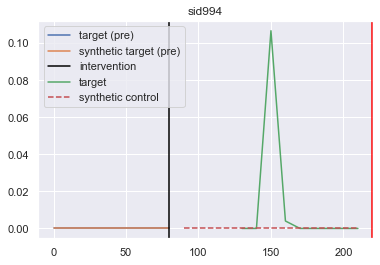

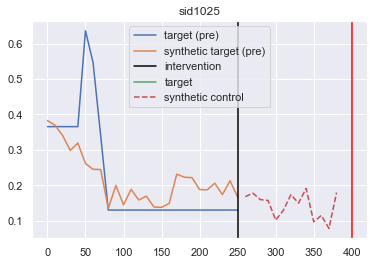

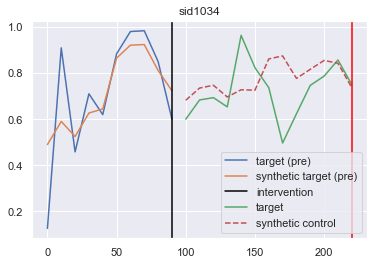

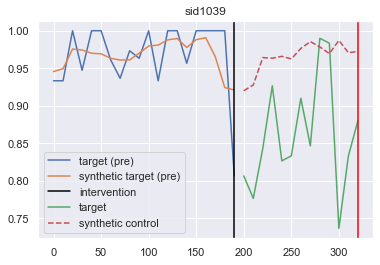

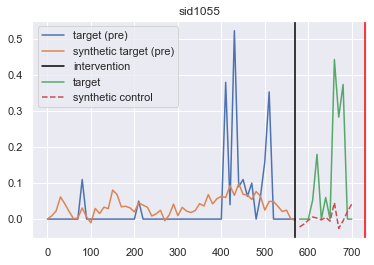

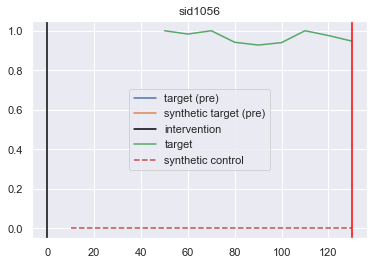

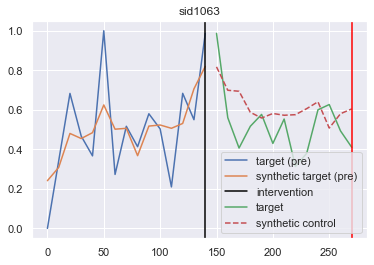

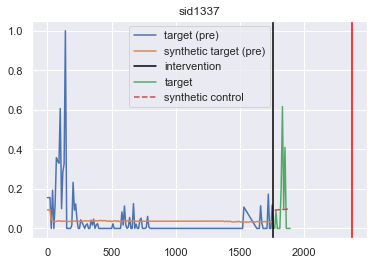

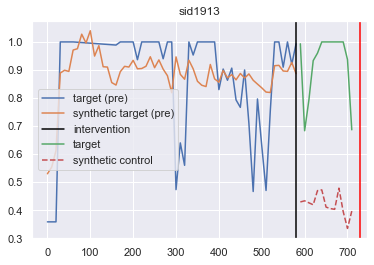

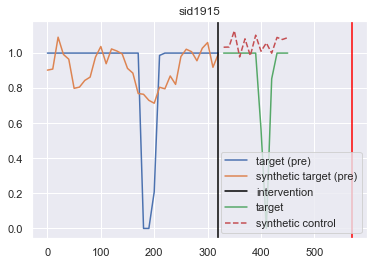

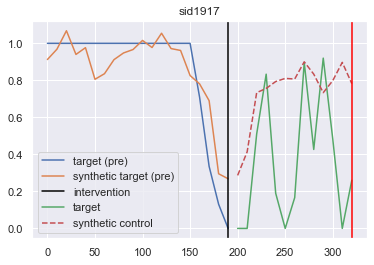

In [480]:
#Synthetic Control
T = intervention['levetiracetam']>0
TE_lev = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
            model = lm.Ridge().fit(x0,x)
#             model = ensemble.ExtraTreesRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_lev.append(y1-y0_predict)
        except:
            print(sid)
TE_lev_df = pd.DataFrame(TE_lev).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
# TE_lev_df.mean(axis=0).plot()

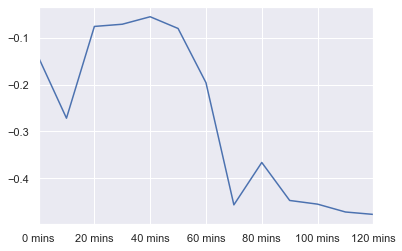

In [481]:
#Matching
epsilon = 0.0001
TE_midazolam = []
for sid in sids:
    x = Pobs_pre.loc[sid]
    t = T.loc[sid]
    if t:
        y1 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,Sc)
        y0 = short_term_outcome.loc[kneighbor].mean(axis=0)
    else:
        y0 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,St)
        y1 = short_term_outcome.loc[kneighbor].mean(axis=0)
    TE_midazolam.append((y1-y0))
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()
# TE_midazolam_df.plot()

In [374]:
x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc['sid30']+f,0:time_of_int[0].loc['sid30']].T

In [376]:
time_of_int.loc['sid30']

0    1239
Name: sid30, dtype: int64

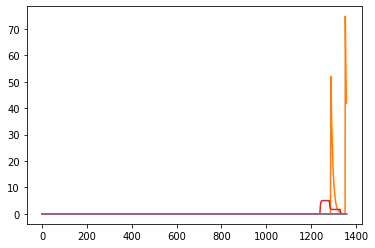

In [385]:
plt.plot(D['sid30'])

# Part-3 Matching on System Dynamics for short-term drug effect estimation

In [1]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm

data_dir = '/Users/harshparikh/IIC/step1_output/'
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_mean_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
data = data.fillna(-999)
print(data.columns)
data = data.drop(columns=['cluster', 'alpha[2]', 'theta[1]', 'theta[2]',
       'theta[3]', 'theta[4]', 'theta[5]', 'theta[6]', 'sigma_err',
       'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]',
       'b[phenobarbital]', 'b[propofol]', 'b[valproate]', 'Gender',
       'marrital', 'APACHE II  first 24', 
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS = T?', 'iGCS-E',
       'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
       'Worst GCS Intubation status', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus'])

Index(['cluster', 'alpha0', 'alpha[1]', 'alpha[2]', 'theta[1]', 'theta[2]',
       'theta[3]', 'theta[4]', 'theta[5]', 'theta[6]', 'sigma_err',
       'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]',
       'b[phenobarbital]', 'b[propofol]', 'b[valproate]', 'Gender', 'Age',
       'marrital', 'APACHE II  first 24', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',


In [3]:
data = data[['alpha0', 'alpha[1]',
#              'b[lacosamide]', 'b[levetiracetam]', 
#              'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]','b[propofol]', 'b[valproate]',
             'Age','iGCS-Total']]

In [4]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes = outcomes.loc[data.index]
outcomes.head()

DC MRS (modified ranking scale) DC GOSE (extended glasgow outcome scale)  \
SID                                                                             
sid2                               5                                        2   
sid3                               6                                        1   
sid4                               6                                        1   
sid5                               2                                        6   
sid7                               4                                        3   

      DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5  
SID                                                          
sid2                                                4.0      
sid3                                                5.0      
sid4                                                5.0      
sid5                                                1.0      
sid7                                                2.0

In [5]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates = covariates.loc[data.index]
covariates.head()

Gender    Age  marrital  APACHE II  first 24  Hx CVA (including TIA)  \
SID                                                                          
sid2     0.0  85.01       0.0                  NaN                     0.0   
sid3     1.0  45.91       1.0                  NaN                     0.0   
sid4     1.0  53.99       1.0                  NaN                     0.0   
sid5     1.0  23.08       0.0                  NaN                     0.0   
sid7     1.0  32.11       1.0                  NaN                     0.0   

      Hx HTN  Hx Sz /epilepsy  Hx brain surgery  Hx CKD  Hx CAD/MI  ...  \
SID                                                                 ...   
sid2     1.0              0.0               0.0     1.0        0.0  ...   
sid3     0.0              1.0               0.0     0.0        0.0  ...   
sid4     0.0              0.0               1.0     0.0        0.0  ...   
sid5     0.0              1.0               0.0     0.0        0.0  ...   
sid7     0.0              0.0               0.0     0.0        0.0  ...   

      iGCS-Total  iGCS = T?  iGCS-E  iGCS-V  iGCS-M  Worst GCS in 1st 24  \
SID                                                                        
sid2         7.0        0.0     1.0     2.0     4.0                  3.0   
sid3         8.0        0.0     3.0     1.0     4.0                  8.0   
sid4         4.0        0.0     1.0     2.0     1.0                  3.0   
sid5         6.0        1.0     1.0     1.0     4.0                  3.0   
sid7         3.0        1.0     1.0     1.0     1.0                  3.0   

      Worst GCS Intubation status  iGCS actual scores  \
SID                                                     
sid2                          1.0                 3.0   
sid3                          0.0                 8.0   
sid4                          1.0                 4.0   
sid5                          1.0                 6.0   
sid7                          1.0                 3.0   

      neuro_dx_Seizures/status epilepticus  prim_dx_Respiratory disorders  
SID                                                                        
sid2                                   0.0                            1.0  
sid3                                   0.0                            1.0  
sid4                                   0.0                            1.0  
sid5                                   1.0                            0.0  
sid7                                   0.0                            0.0  

[5 rows x 37 columns]

In [6]:
def get_pk_k():
    halflife = pd.DataFrame({
        'lacosamide':[13],
        'levetiracetam':[6],
        'midazolam':[1.5],
        'pentobarbital':[15],
        'phenobarbital':[53],
        'phenytoin':[22],
        'propofol':[1.5],
        'valproate':[8]
        },index=['t1/2'])
    halflife = halflife.append(np.log(2) / halflife.rename(index={'t1/2':'k'}))
    PK_K = halflife.loc['k']
    return PK_K
    
def drug_concentration(d_ts,k):
    """
    d_ts.shape = (#drug, T)
    """
    k_ts = np.array([ np.exp(-k*t) for t in range(d_ts.shape[1]) ]).T
    conc = np.array([np.convolve(d_ts[i],k_ts[i],'full') for i in range(d_ts.shape[0])])
    conc = conc[:,:d_ts.shape[1]]
    return conc


# # data functions


def patient(path, W):
    window = W
    step   = W
    
    #if '.mat' in path:
    mat = sio.loadmat(path)
    human_iic = mat['human_iic'].flatten().astype(float)
    spike = mat['spike'].flatten().astype(float)
    drugs = mat['drugs_weightnormalized'].astype(float)
    artifact = mat['artifact'].flatten().astype(float)
    freq = mat['spec_freq'].flatten().astype(float)
    spec = mat['spec'].astype(float)
    human_iic[artifact==1] = np.nan
    spike[artifact==1] = np.nan

    drugnames = list(map(lambda x: x.strip(), mat['Dnames']))
    drugs_window = np.array([ np.mean(drugs[i:i+window],axis=0) for i in range(0,len(drugs),step) ])

    sz_burden = (human_iic==1).astype(float)
    sz_burden[np.isnan(human_iic)] = np.nan
    sz_burden_window = np.array([np.nanmean(sz_burden[i:i+window]) for i in range(0, len(sz_burden),step)])

    iic_burden = np.in1d(human_iic, [1,2,3,4]).astype(float)
    iic_burden[np.isnan(human_iic)] = np.nan
    iic_burden_window = np.array([np.nanmean(iic_burden[i:i+window]) for i in range(0, len(iic_burden),step)])

    spike_rate_window = np.array([np.nanmean(spike[i:i+window]) for i in range(0, len(spike),step)])

    spec_window = np.array([np.nanmean(spec[i:i+window], axis=0) for i in range(0, len(spec),step)])
    
    res = {'sz_burden': sz_burden_window,
           'iic_burden': iic_burden_window,
           'spike_rate': spike_rate_window,
           'spec': spec_window,
           'freq': freq}
    for i, dn in enumerate(drugnames):
        res[dn] = drugs_window[:,i]
    return res


# In[6]:


def preprocess(sid, data_dir, PK_K, W, drugs_tostudy):  # previsously called patient_data

    #fetch the data
    p = patient(os.path.join(data_dir, sid + '.mat'), W)

    #setting up the data
    response_tostudy = 'iic_burden'
    Pobs = p[response_tostudy]

    #PK
    Ddose = np.array([p[x] for x in drugs_tostudy])
    D = drug_concentration(Ddose, PK_K[drugs_tostudy].values).T

    #cov_tostudy = ['Age']
    C = pd.read_csv(os.path.join(data_dir, 'covariates.csv'))
    Cname = list(C.columns)
    C = C[C.Index==sid].iloc[0]#[cov_tostudy]
    
    return Pobs, response_tostudy, D, drugs_tostudy, C, Cname, p['spec'], p['freq']


In [7]:
patients = {}

sids = ['sid2', 'sid8', 'sid13', 'sid17', 'sid18', 'sid30', 'sid36', 'sid39', 'sid54',
        'sid56', 'sid69', 'sid77', 'sid82', 'sid88', 'sid91', 'sid92', 'sid297', 'sid327',
        'sid385', 'sid395', 'sid400', 'sid403', 'sid406', 'sid424', 'sid450', 'sid456',
        'sid490', 'sid512', 'sid551', 'sid557', 'sid734', 'sid736', 'sid801', 'sid821',
        'sid824', 'sid827', 'sid832', 'sid833', 'sid834', 'sid839', 'sid848', 'sid849',
        'sid852', 'sid872', 'sid876', 'sid880', 'sid881', 'sid884', 'sid886',
        'sid915', 'sid940', 'sid942', 'sid944', 'sid952', 'sid960', 'sid965', 'sid967',
        'sid983', 'sid987', 'sid988', 'sid994', 'sid1002', 'sid1006', 'sid1016', 'sid1022',
        'sid1025', 'sid1034', 'sid1038', 'sid1039', 'sid1055', 'sid1056', 'sid1063', 'sid1113',
        'sid1116', 'sid1337', 'sid1913', 'sid1915', 'sid1916', 'sid1917', 'sid1928', 'sid1956', 'sid1966']

drugs_tostudy = ['lacosamide', 'levetiracetam', 'midazolam','propofol', 'valproate']
    
PK_K = get_pk_k()

W = 300
Pobs = {}
D = {}
# spec = []
# freq = []
for sid in tqdm.tqdm(sids):
    Pobs_, Pname, D_, Dname, C_, Cname, spec_, freq_ = preprocess(sid, data_dir, PK_K, W, drugs_tostudy)
    Pobs_ = pd.DataFrame(Pobs_.reshape(-1,1),columns=[Pname])
    D_ = pd.DataFrame(D_,columns=Dname)
    Pobs[sid] = Pobs_
    D[sid] = D_

100%|██████████| 82/82 [00:23<00:00,  3.55it/s]


In [8]:
def intervention_information(Pobs,D,sids,f=6):
    Pobs_pre, Pobs_pre_mean, intervention, outcome, time_of_int = {}, {}, {}, {}, {}
    for sid in sids:
        t = np.min(D[sid].loc[D[sid].sum(axis=1) > 0].index)
        Pobs_pre[sid] = Pobs[sid].loc[:t]['iic_burden']
        Pobs_pre_mean[sid] = np.nanmean(Pobs[sid].loc[:t]['iic_burden'])
        intervention[sid] = D[sid].loc[t]
        outcome[sid] = Pobs[sid].loc[t:t+f]['iic_burden'].to_numpy()
        time_of_int[sid] = t
    return pd.DataFrame.from_dict(Pobs_pre,orient='index').fillna(0), pd.DataFrame.from_dict(Pobs_pre_mean,orient='index').rename(columns={0:'IICRatio(Preintervention)'}), pd.DataFrame.from_dict(intervention,orient='index'), pd.DataFrame.from_dict(outcome,orient='index'), pd.DataFrame.from_dict(time_of_int,orient='index')
    

In [9]:
f=6
Pobs_pre, Pobs_pre_mean, intervention, short_term_outcome, time_of_int = intervention_information(Pobs,D,sids,f)

In [10]:
Pobs_pre_mean.head()

IICRatio(Preintervention)
sid2                    0.485855
sid8                         NaN
sid13                        NaN
sid17                   0.000000
sid18                   0.845515

In [11]:
int_temp = (intervention>0)
print(list(int_temp.columns))
int_temp.groupby(list(int_temp.columns)).size()

['lacosamide', 'levetiracetam', 'midazolam', 'propofol', 'valproate']


lacosamide  levetiracetam  midazolam  propofol  valproate
False       False          False      False     True          6
                                      True      False        26
                           True       False     False         7
                                      True      False         3
            True           False      False     False        30
                                      True      False         3
True        False          False      False     False         7
dtype: int64

In [96]:
drug = 'levetiracetam'
int_temp = (intervention>0)[[drug]]*1
int_temp.mean()

levetiracetam    0.402439
dtype: float64

In [97]:
X = data
X.head()

alpha0  alpha[1]    Age  iGCS-Total
SID                                        
sid2  0.843014 -0.071506  85.01         7.0
sid3  0.596874  0.385038  45.91         8.0
sid4 -0.024792  0.458008  53.99         4.0
sid5 -0.566219 -0.226646  23.08         6.0
sid7 -0.767666  0.230464  32.11         3.0

In [98]:
st_outcome = pd.DataFrame(short_term_outcome.interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').mean(axis=1)).rename(columns={0:'st_outcome'})
st_outcome.head()

st_outcome
sid2     0.157546
sid8     0.379964
sid13    0.000000
sid17    0.000000
sid18    0.971524

In [99]:
df = Pobs_pre_mean.join(X,how='inner').join(int_temp,how='inner').join(st_outcome,how='inner')
df = df.dropna()
df['$\Delta$ IIC'] = (df['st_outcome']-df['IICRatio(Preintervention)'])/(df['IICRatio(Preintervention)']+0.001)
df = df.drop(columns=['IICRatio(Preintervention)','st_outcome'])
df.shape

(59, 6)

In [100]:
import pymalts2 as malts

In [101]:
m = malts.malts_mf(outcome='$\Delta$ IIC',treatment=drug,data=df,discrete=['iGCS-Total'],k_est=8,k_tr=5,n_splits=3,n_repeats=20)
# 'Hx CVA (including TIA)', 'Hx HTN',
#        'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
#        'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
#        'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
#        'Hx other substance abuse, any time in their life',
#        'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma','prim_dx_Respiratory disorders'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Treatment Effects
avg.CATE        -33.649471
$\Delta$ IIC     23.379790
levetiracetam     0.423729
dtype: float64
Distance Metric
alpha[1]      0.064060
alpha0        0.133909
Age           0.022075
iGCS-Total    0.058823
dtype: float64


<AxesSubplot:>

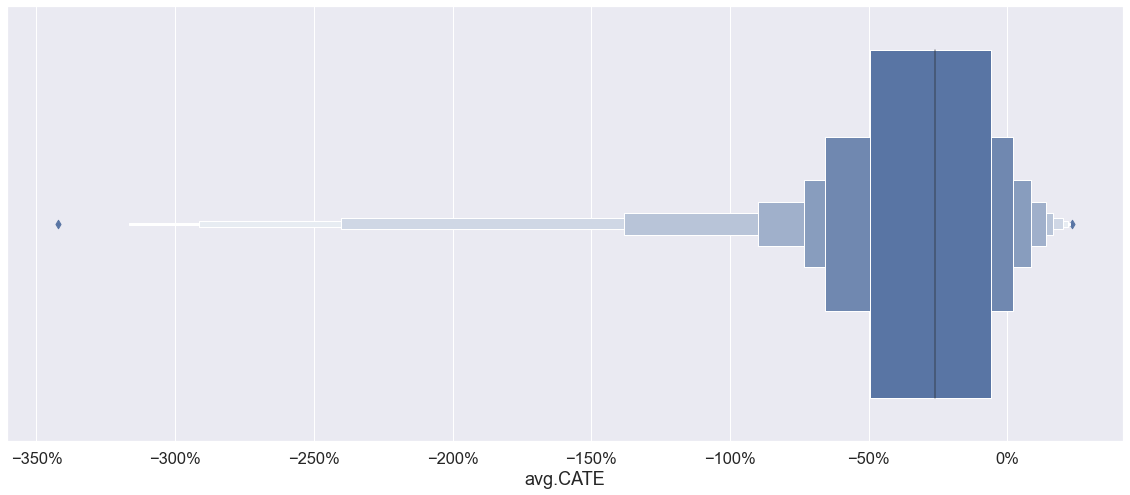

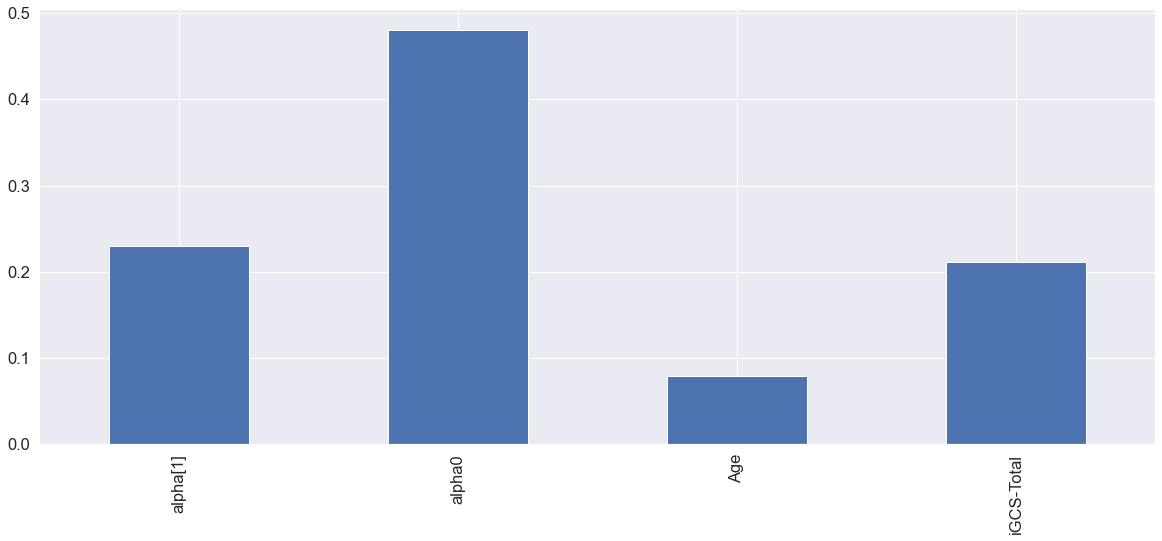

In [102]:
import matplotlib.ticker as ticker
#negative means the drug works, positive means the drug doesn't work
sns.set(font_scale=1.5)
print('Treatment Effects')
print(m.CATE_df[['avg.CATE','$\Delta$ IIC',drug]].mean(axis=0))
fig,ax = plt.subplots(figsize=(20,8))
sns.boxenplot(m.CATE_df['avg.CATE'])
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
print('Distance Metric')
print(pd.concat(m.M_opt_list).mean(axis=0))
fig,ax = plt.subplots(figsize=(20,8))
(pd.concat(m.M_opt_list).mean(axis=0)/pd.concat(m.M_opt_list).mean(axis=0).sum()).plot(kind='bar',ax=ax)
# plt.figure()
# sns.scatterplot(df['IICRatio(Preintervention)'],m.CATE_df['avg.CATE'])

In [103]:
import networkx as nx
from matplotlib import cm

In [104]:
from pyvis.network import Network
sns.set(font_scale=2)

[-1  0 -1 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  0 -1  0  1 -1 -1  1 -1  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1  1
  1  1 -1 -1 -1 -1  0  1 -1 -1 -1]


<AxesSubplot:xlabel='iGCS-Total', ylabel='Age'>

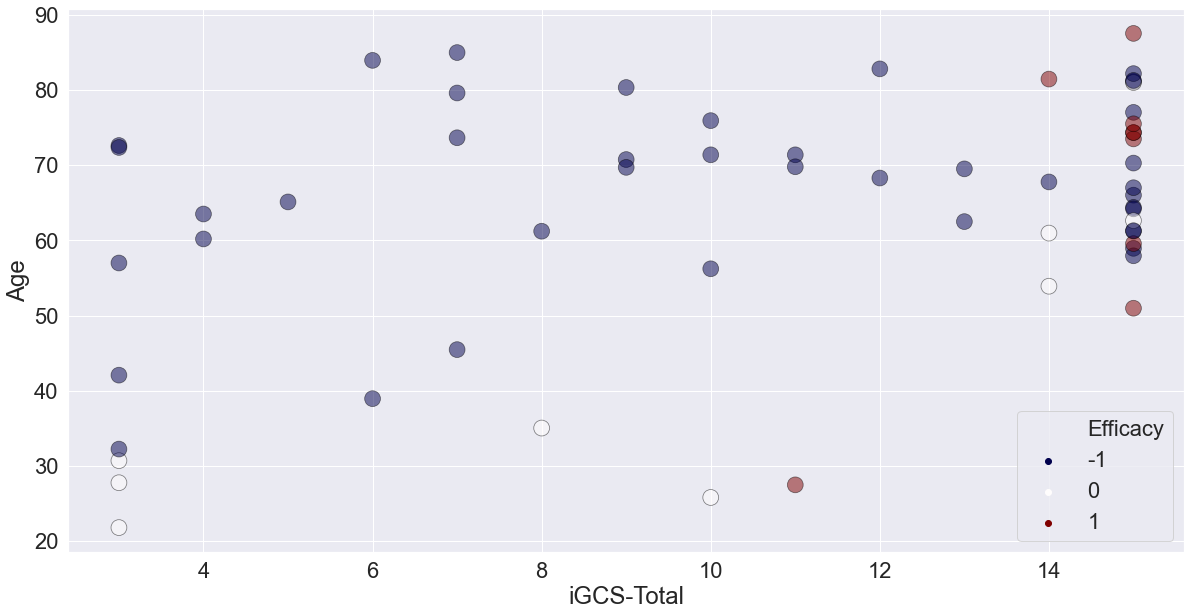

In [105]:
A = m.MG_matrix
G = nx.from_pandas_adjacency(A>14,create_using=nx.DiGraph)
effective_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']<=-10].index
non_effective_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']>=0].index
boundary_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']<=0].index
for idx in list(boundary_idx):
    G.nodes[idx]['group']=0
for idx in list(effective_idx):
    G.nodes[idx]['group']=-1
for idx in non_effective_idx:
    G.nodes[idx]['group']=1
for idx in G.nodes:
    G.nodes[idx]['pos'] = (df.loc[idx]['iGCS-Total'],df.loc[idx]['Age'])
pos=nx.get_node_attributes(G,'pos')
group=nx.get_node_attributes(G,'group')
print(np.array(list(group.values())))
df['Efficacy'] = np.array(list(group.values()))
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'iGCS-Total',y = 'Age',hue='Efficacy',data=df,palette=cm.seismic,s=250,alpha=0.5,edgecolor='black')
# nx.draw_networkx_edges(G,pos,alpha=0.5)


# plt.xlim((-4,6))
# plt.xlim((-0.6,0.6))
# nx.draw_kamada_kawai(G,node_colo)

<AxesSubplot:>

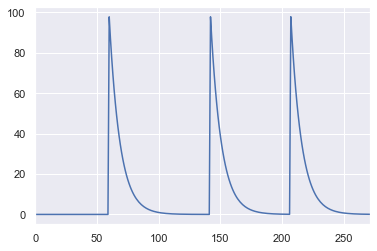

In [43]:
D['sid1916']['lev']

In [46]:
A = m.MG_matrix
G = nx.from_pandas_adjacency(A>14,create_using=nx.DiGraph)
effective_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']<=-10].index
non_effective_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']>0].index
boundary_idx = m.CATE_df.loc[m.CATE_df['avg.CATE']<=0].index
for idx in list(boundary_idx):
    G.nodes[idx]['group']=1
for idx in list(effective_idx):
    G.nodes[idx]['group']=2
for idx in non_effective_idx:
    G.nodes[idx]['group']=0


In [47]:
nt = Network(height=700,width=800,notebook=True)
nt.from_nx(G)
nt.show('G.html')

In [257]:
df.loc['sid827']

alpha0            0.918758
alpha[1]          0.496388
Age              27.750000
iGCS-Total        3.000000
levetiracetam     0.000000
$\Delta$ IIC      0.000000
Efficacy          1.000000
Name: sid827, dtype: float64

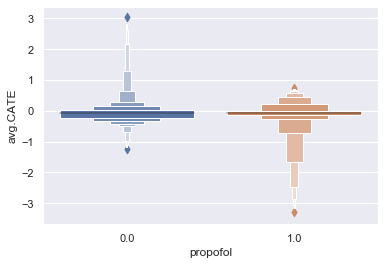

In [90]:
sns.boxenplot(x=drug,y='avg.CATE',data=m.CATE_df)

[Text(697.5, 475.65000000000003, 'prim_dx_Respiratory disorders <= 0.5\ngini = 0.5\nsamples = 72\nvalue = [36, 36]'),
 Text(558.0, 339.75, 'Worst GCS in 1st 24 <= 9.5\ngini = 0.497\nsamples = 63\nvalue = [29, 34]'),
 Text(279.0, 203.85000000000002, 'Worst GCS in 1st 24 <= 5.0\ngini = 0.451\nsamples = 32\nvalue = [11, 21]'),
 Text(139.5, 67.94999999999999, 'gini = 0.499\nsamples = 21\nvalue = [11, 10]'),
 Text(418.5, 67.94999999999999, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(837.0, 203.85000000000002, 'Hx HTN <= 0.5\ngini = 0.487\nsamples = 31\nvalue = [18, 13]'),
 Text(697.5, 67.94999999999999, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(976.5, 67.94999999999999, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(837.0, 339.75, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]')]

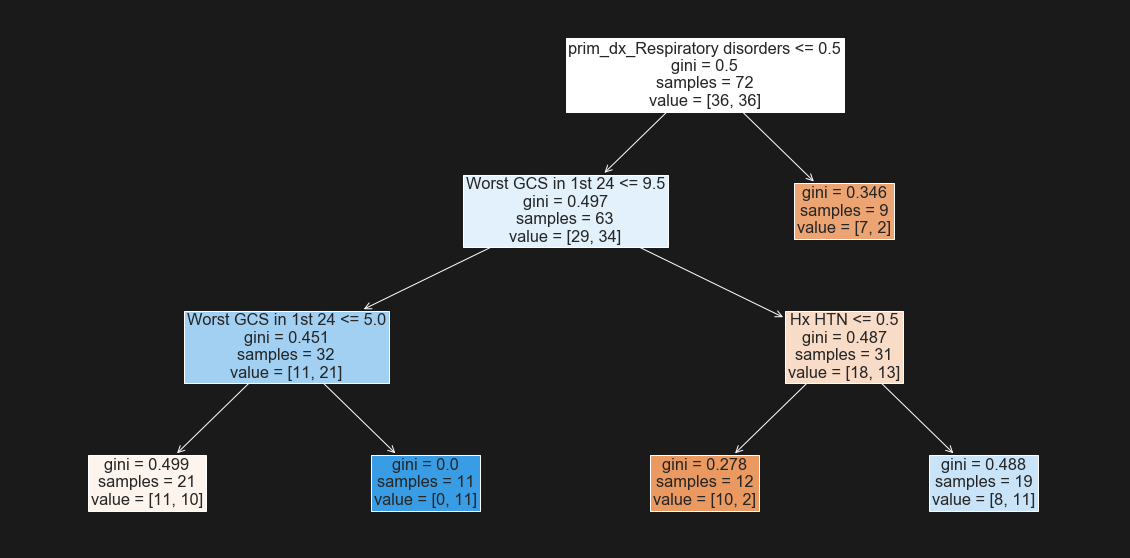

In [155]:
posterior_rule = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=5).fit(X=covariates[['Gender','Age',
                                                                             'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                                                                             'Hx brain surgery','Worst GCS in 1st 24',
                                                                             'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders']].fillna(0),
                                                               y=m.CATE_df['avg.CATE']<-0.07)
sns.set(font_scale=2)
fig,ax = plt.subplots(figsize=(20,10),facecolor='k')
tree.plot_tree(posterior_rule,filled=True,feature_names=['Gender','Age',
                                                            'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                                                            'Hx brain surgery','Worst GCS in 1st 24',
                                                            'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders']
              ,rotate=True, ax=ax)


In [168]:
!pip install 'umap-learn==0.3.10'

     |████████████████████████████████| 40kB 1.9MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.3.10-cp37-none-any.whl size=38881 sha256=ab2af8c89a133f3f16f53f29be1cdffcd6a797406174085136f807b67f2460c2
  Stored in directory: /Users/harshparikh/Library/Caches/pip/wheels/d0/f8/d5/8e3af3ee957feb9b403a060ebe72f7561887fef9dea658326e
Successfully built umap-learn
  Found existing installation: umap-learn 0.4.6
    Uninstalling umap-learn-0.4.6:
      Successfully uninstalled umap-learn-0.4.6


In [170]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,n_components=n_components,metric=metric)

In [174]:
X = covariates[['Gender','Age',
                'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                'Hx brain surgery','Worst GCS in 1st 24',
                'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders']].values
scaled_X = StandardScaler().fit_transform(X)
embedding = reducer.fit_transform(scaled_X)
embedding.shape

(72, 2)

Text(0.5, 1.0, 'UMAP Preadmission Cov')

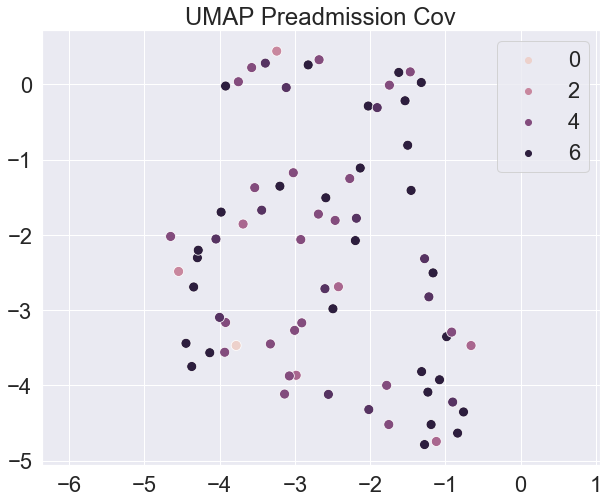

In [180]:
sns.color_palette()[1]

(0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

In [ ]:
posterior_rule = lm.LogisticRegression().fit(X=covariates[['Gender','Age',
                                                                             'Hx CVA (including TIA)','Hx HTN','Hx Sz /epilepsy',
                                                                             'Hx brain surgery','Worst GCS in 1st 24',
                                                                             'neuro_dx_Seizures/status epilepticus','prim_dx_Respiratory disorders']].fillna(0),
                                                               y=m.CATE_df['avg.CATE']<0)

sid30


Text(0.5, 1.0, 'propofol')

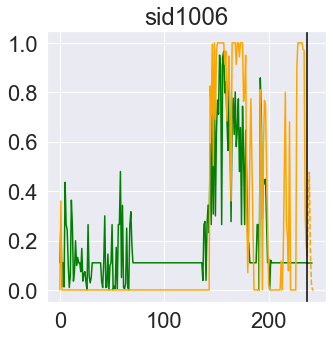

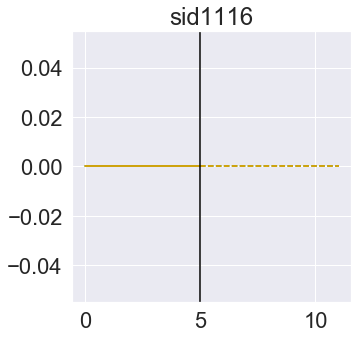

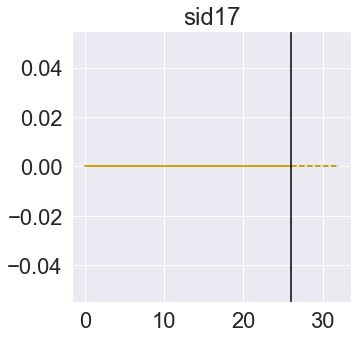

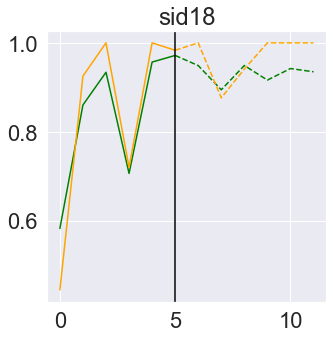

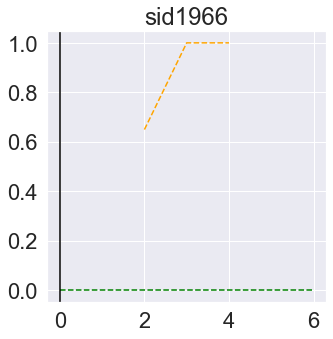

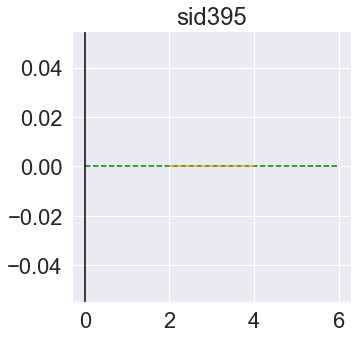

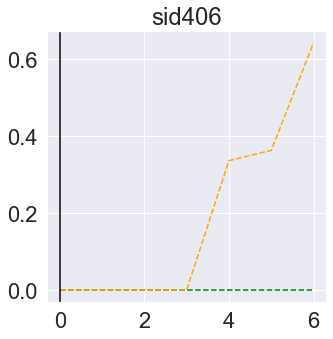

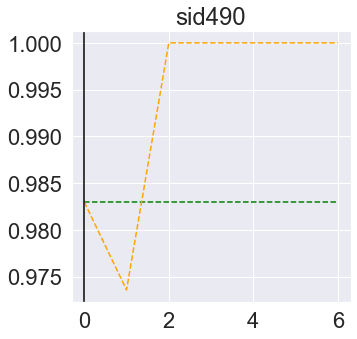

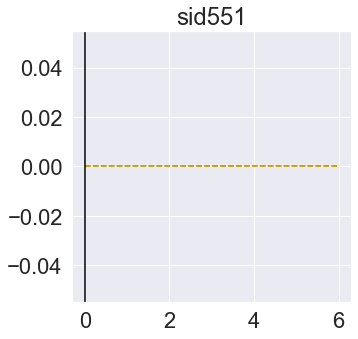

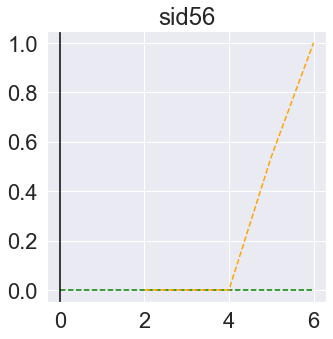

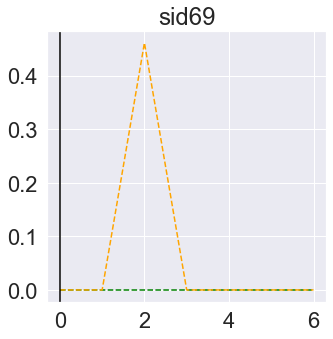

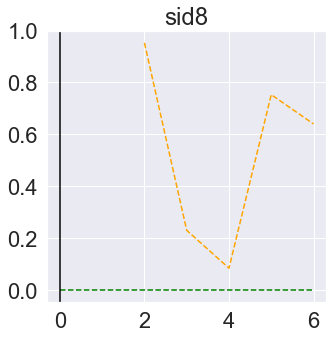

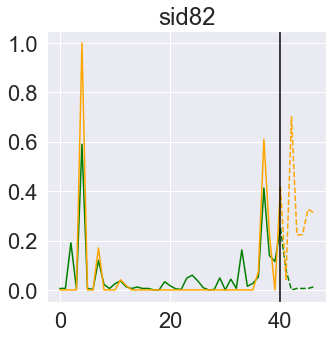

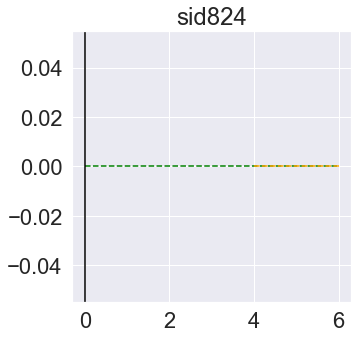

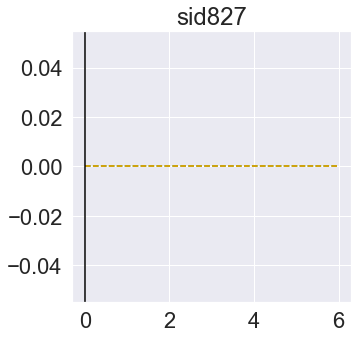

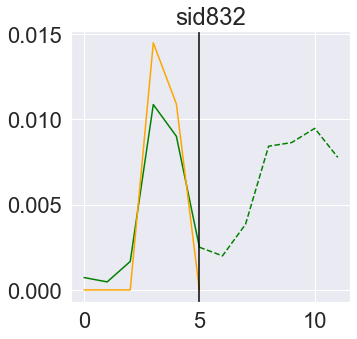

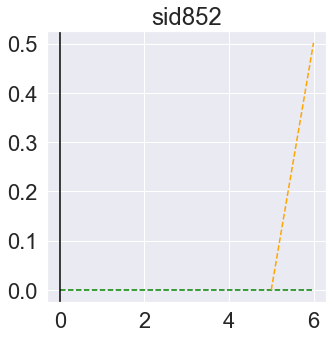

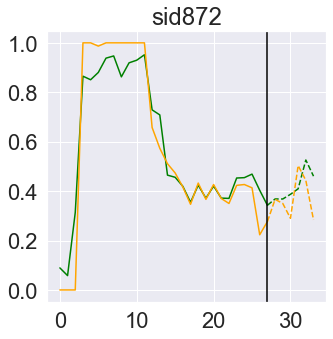

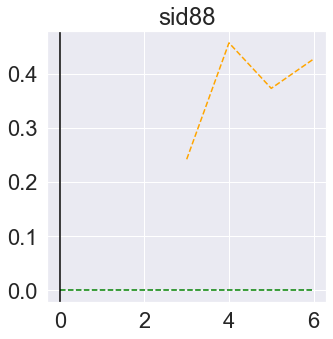

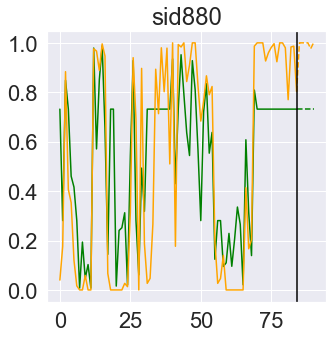

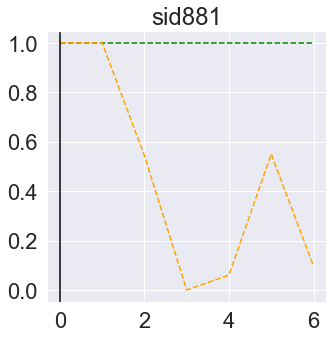

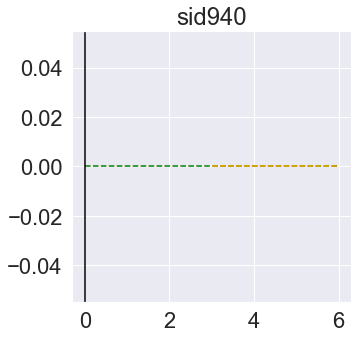

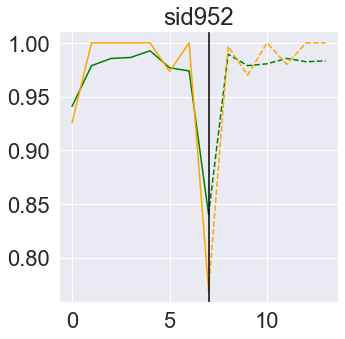

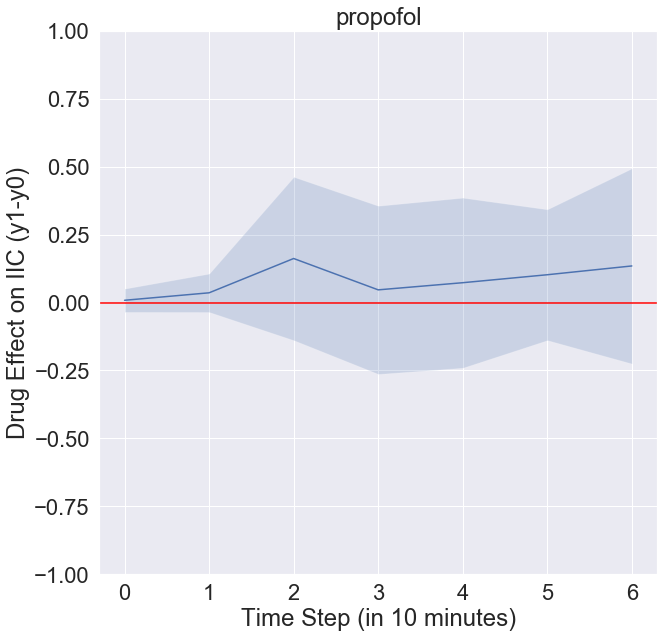

In [146]:
effect = []
for idx in m.CATE_df.index:
    if df.loc[idx,drug]==1:
        toi = time_of_int.loc[idx,0]
        mg_0 = df.loc[(m.MG_matrix.loc[idx]>0),drug]==0
        mg_0 = mg_0[mg_0==True]
        mg_0 = time_of_int.loc[mg_0.index,0]>(toi+f)
        mg_0 = mg_0[mg_0==True]
        if len(mg_0)>0:
            mg_1_preint = Pobs_pre.loc[idx,:toi].interpolate(method='linear', limit_direction='forward').fillna(method='bfill').fillna(0)
            mg_0_preint = Pobs_pre.loc[mg_0.index,:toi].interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').fillna(0)
            mg_0_outcome = Pobs_pre.loc[mg_0.index,toi:toi+f].interpolate(method='linear', limit_direction='forward', axis=1).fillna(method='bfill').fillna(0)
            model = ensemble.RandomForestRegressor().fit(mg_0_preint.T,mg_1_preint)
            fig = plt.figure(figsize=(5,5))
    #         plt.plot(mg_0_outcome.mean(axis=0))
    #         plt.plot(short_term_outcome.loc[idx])
            mg_0_preint_m = model.predict(mg_0_preint.T)
            mg_0_outcome_m = model.predict(mg_0_outcome.T)
            preint = mg_1_preint.to_numpy() - mg_0_preint_m
            
            eff = short_term_outcome.loc[idx].to_numpy() - mg_0_outcome_m
            plt.plot(np.arange(0,toi+1),mg_0_preint_m,c='green')
            plt.plot(np.arange(toi,toi+f+1),mg_0_outcome_m,c='green',ls='--')
            plt.plot(np.arange(0,toi+1),mg_1_preint.to_numpy(),c='orange')
            plt.plot(np.arange(toi,toi+f+1),short_term_outcome.loc[idx].to_numpy(),c='orange',ls='--')
            plt.axvline(toi,c='black')
            plt.title(idx)
            effect.append(eff)
        else:
            print(idx)
effect = np.array(effect)
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0,f+1),np.nanmean(effect,axis=0))
plt.fill_between(np.arange(0,f+1),
                 np.nanmean(effect,axis=0)+np.std(np.nan_to_num(effect),axis=0),
                 np.nanmean(effect,axis=0)-np.std(np.nan_to_num(effect),axis=0),alpha=0.2)
plt.axhline(0,c='red')
plt.xlabel('Time Step (in 10 minutes)')
plt.ylabel('Drug Effect on IIC (y1-y0)')
plt.ylim((-1,1))
plt.title(drug)

In [278]:
toi = time_of_int.loc[idx,0]
mg_0 = df.loc[(m.MG_matrix.loc[idx]>0),drug]==0
mg_0 = mg_0[mg_0==True]
print(mg_0.index)
mg_0 = time_of_int.loc[mg_0.index,0]>toi
mg_0 = mg_0[mg_0==True]
Pobs_pre.loc[mg_0.index,toi:toi+f].mean(axis=0).to_numpy()

Index(['sid8', 'sid18', 'sid30', 'sid88', 'sid327', 'sid406', 'sid456',
       'sid490', 'sid557', 'sid734', 'sid821', 'sid824', 'sid827', 'sid839',
       'sid852', 'sid872', 'sid881', 'sid940', 'sid960', 'sid983', 'sid1022',
       'sid1116', 'sid1956', 'sid1966'],
      dtype='object')


array([0.59174541, 0.53722222, 0.54611111, 0.49480969, 0.49532164,
       0.49388889, 0.5       , 0.55503584, 0.36131387, 0.36649215,
       0.38722222, 0.37111111, 0.42555556])

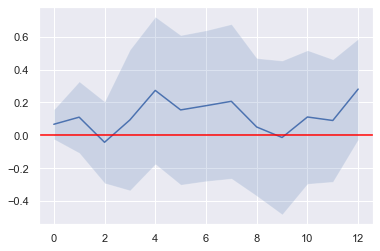

In [301]:
plt.plot(np.arange(0,13),np.nanmean(effect,axis=0))
plt.fill_between(np.arange(0,13),
                 np.nanmean(effect,axis=0)+np.std(np.nan_to_num(effect),axis=0),
                 np.nanmean(effect,axis=0)-np.std(np.nan_to_num(effect),axis=0),alpha=0.2)
plt.axhline(0,c='red')

# Part 4 Outcome Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm
import sklearn.tree as tree
import mord
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
import networkx as nx
from sklearn.metrics import confusion_matrix

#data_dir = '/home/kentaro/Dropbox/'
data_dir = '/Users/harshparikh/IIC/step1_output/'
warnings.filterwarnings("ignore")

In [2]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

Gender    Age  marrital  APACHE II  first 24  Hx CVA (including TIA)  \
Index                                                                         
sid1        0  19.93       0.0                  NaN                     0.0   
sid2        0  85.01       0.0                  NaN                     0.0   
sid3        1  45.91       1.0                  NaN                     0.0   
sid4        1  53.99       1.0                  NaN                     0.0   
sid5        1  23.08       0.0                  NaN                     0.0   

       Hx HTN  Hx Sz /epilepsy  Hx brain surgery  Hx CKD  Hx CAD/MI  ...  \
Index                                                                ...   
sid1      0.0              0.0               0.0     0.0        0.0  ...   
sid2      1.0              0.0               0.0     1.0        0.0  ...   
sid3      0.0              1.0               0.0     0.0        0.0  ...   
sid4      0.0              0.0               1.0     0.0        0.0  ...   
sid5      0.0              1.0               0.0     0.0        0.0  ...   

       iGCS-Total  iGCS = T?  iGCS-E  iGCS-V  iGCS-M  Worst GCS in 1st 24  \
Index                                                                       
sid1           11          0       4       1       6                   11   
sid2            7          0       1       2       4                    3   
sid3            8          0       3       1       4                    8   
sid4            4          0       1       2       1                    3   
sid5            6          1       1       1       4                    3   

       Worst GCS Intubation status  iGCS actual scores  \
Index                                                    
sid1                             0                  11   
sid2                             1                   3   
sid3                             0                   8   
sid4                             1                   4   
sid5                             1                   6   

       neuro_dx_Seizures/status epilepticus  prim_dx_Respiratory disorders  
Index                                                                       
sid1                                      0                              0  
sid2                                      0                              1  
sid3                                      0                              1  
sid4                                      0                              1  
sid5                                      1                              0  

[5 rows x 37 columns]

In [3]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

DC MRS (modified ranking scale)  \
Index                                   
sid1                                3   
sid2                                5   
sid3                                6   
sid4                                6   
sid5                                2   

      DC GOSE (extended glasgow outcome scale)  \
Index                                            
sid1                                         5   
sid2                                         2   
sid3                                         1   
sid4                                         1   
sid5                                         6   

       DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5  
Index                                                         
sid1                                                 1.0      
sid2                                                 4.0      
sid3                                                 5.0      
sid4                                                 5.0      
sid5                                                 1.0

<AxesSubplot:xlabel='DC MRS (modified ranking scale)', ylabel='count'>

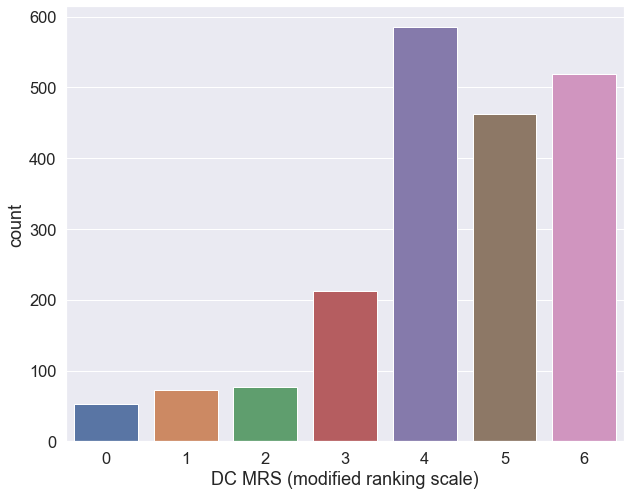

In [4]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,8))
sns.countplot(x="DC MRS (modified ranking scale)", 
              data=outcomes[['DC MRS (modified ranking scale)']].loc[outcomes['DC MRS (modified ranking scale)']!='na'].dropna().astype(int))

### Outcome Regression: (C,Theta -> Y)

#### ignore this

0.8342857142857143
0.8142857142857143
[[ 62 109]
 [ 21 508]]


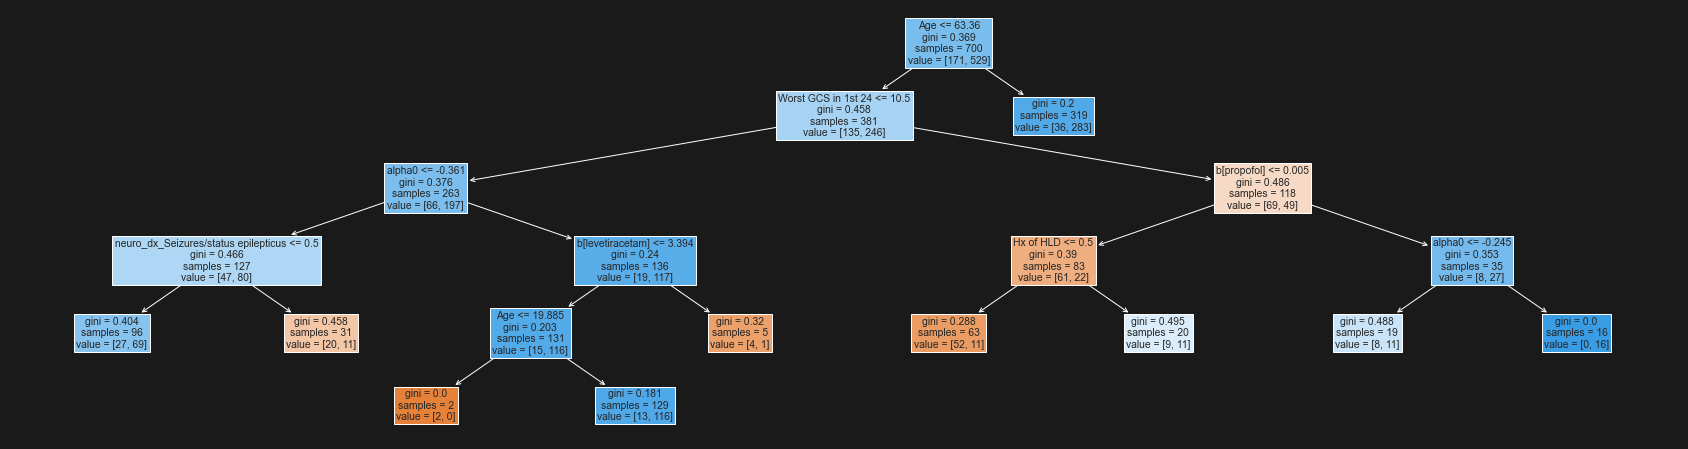

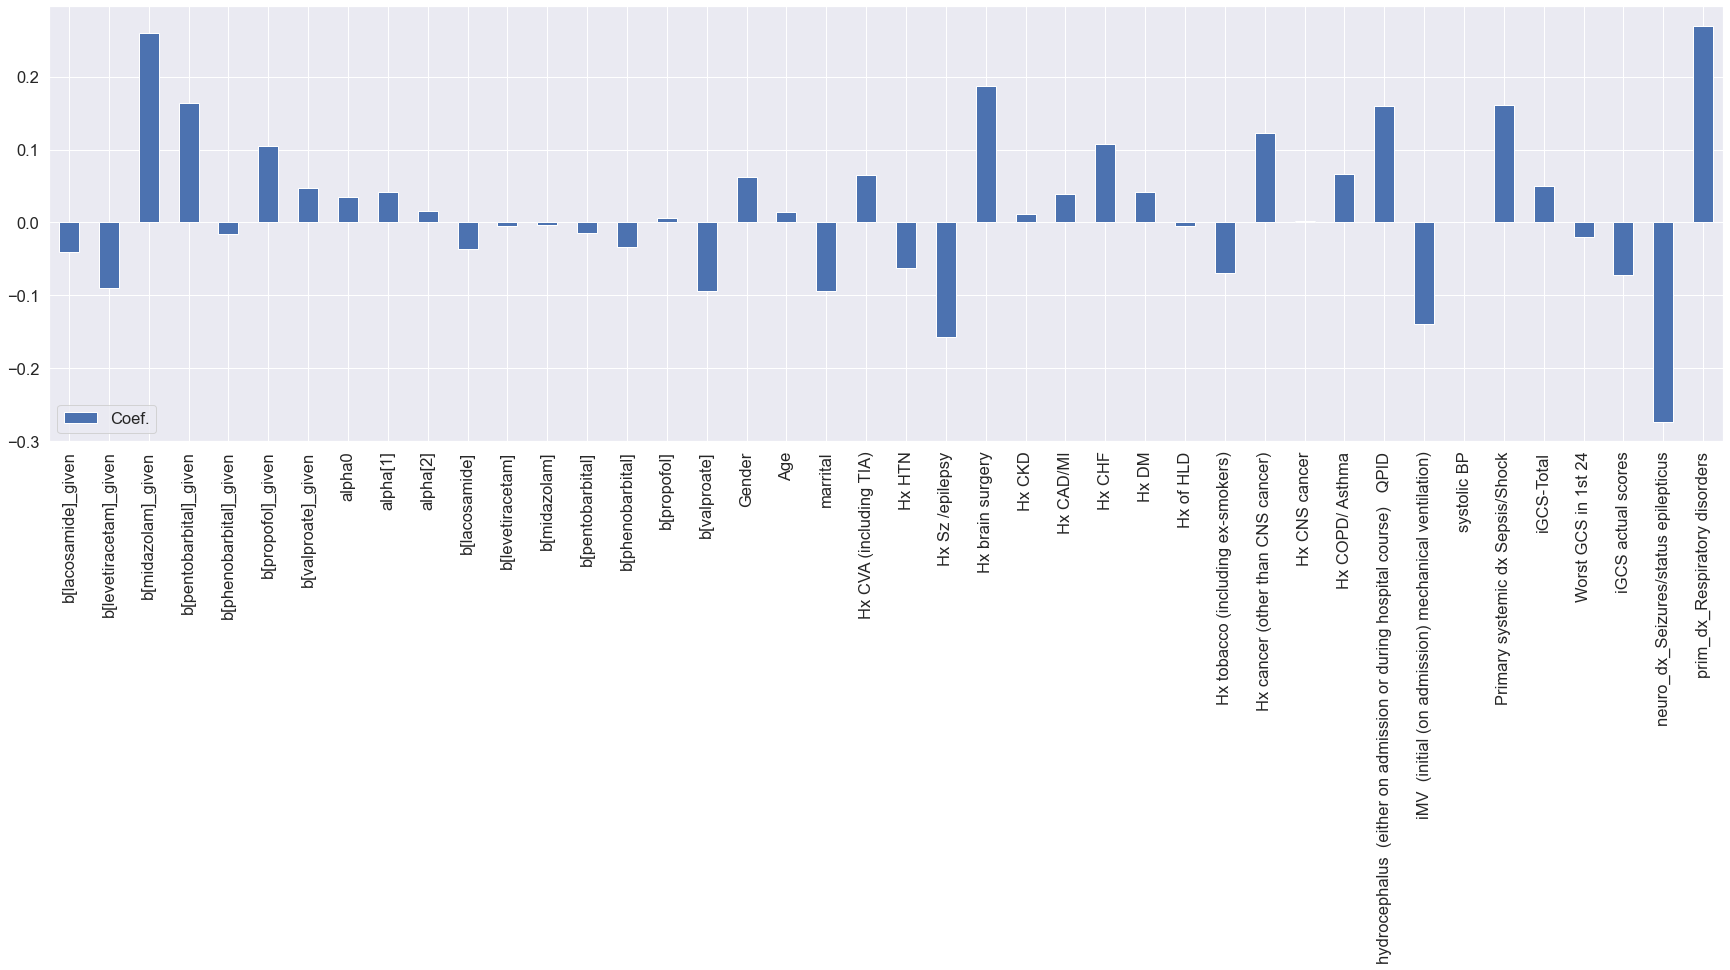

In [5]:
#thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_mean_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
# print(thetas.columns)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]',
        'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 
        'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)



thetas = theta_prime.join(thetas,lsuffix='_given')

Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
Y = Y.loc[Y['DC MRS (modified ranking scale)']!='4']
Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) > 4).astype(int)


thetas = thetas.loc[list(Y.index)]

# print(thetas.columns)
outcome_pred_model = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10).fit(thetas,Y)
outcome_pred_model2 = lm.RidgeClassifierCV().fit(thetas,Y)

sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(30,8),facecolor='k')
tree.plot_tree(outcome_pred_model,feature_names=list(thetas.columns),filled=True)

coef = pd.DataFrame(outcome_pred_model2.coef_[0],index=list(thetas.columns),columns=['Coef.'])
fig,ax = plt.subplots(figsize=(30,8))
coef.plot(kind='bar',ax=ax)

# fig,ax = plt.subplots(figsize=(20,8))
# thetas[['alpha0', 'alpha[1]', 'alpha[2]','b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]']].plot(kind='box',ax=ax)

print(outcome_pred_model.score(thetas,Y))
print(outcome_pred_model2.score(thetas,Y))
# thetas[['alpha0', 'alpha[1]', 'alpha[2]','theta[1]', 'theta[2]','theta[3]', 'theta[4]', 'theta[5]', 'theta[6]']].head()

Y_hat = outcome_pred_model2.predict(thetas)
print(confusion_matrix(Y,Y_hat))

In [6]:
import plotly.express as px

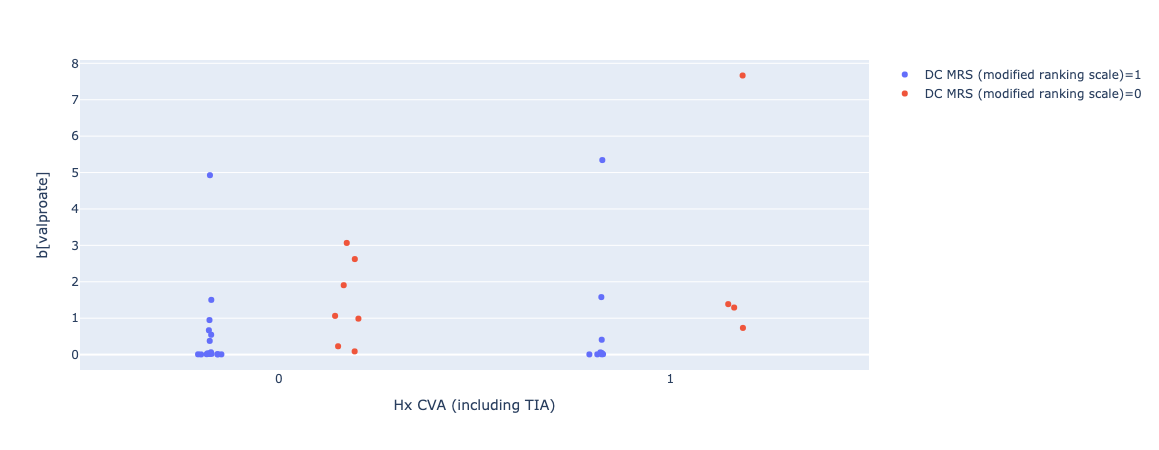

In [23]:
x = thetas['Age']
y = thetas['Worst GCS in 1st 24']
z = thetas['alpha0']
theta_full = thetas.join(Y.astype(str),how='inner')
theta_full['GCS-Severe (Below 9)'] = (theta_full['iGCS actual scores']<=9).astype(int)
theta_full['Old (Age>60)'] = (theta_full['Age']>=60).astype(int)
fig = px.box(theta_full.loc[theta_full['b[valproate]_given']!=0],
             x='Hx CVA (including TIA)',
             y='b[valproate]',
             color='DC MRS (modified ranking scale)')#,opacity=0.4)
fig = px.strip(theta_full.loc[theta_full['b[valproate]_given']!=0],
             x='Hx CVA (including TIA)',
             y='b[valproate]',
             color='DC MRS (modified ranking scale)')
# fig = px.scatter_3d(theta_full,x='b[propofol]_given',y='iGCS-Total',z='b[propofol]',color='DC MRS (modified ranking scale)',opacity=0.4)
fig.show()
# c = Y
# my_cmap = plt.get_cmap('RdBu_r')
# ax.scatter3D(x, y, z, c = Y['DC MRS (modified ranking scale)'], cmap = my_cmap,alpha=0.4)
# ax.set_xlabel('Age', fontweight ='bold') 
# ax.set_ylabel('Worst GCS in 1st 24h', fontweight ='bold') 
# ax.set_zlabel('Alpha0', fontweight ='bold') 

#### Outcome Regression using Decision Tree and Ridge Classifier

0.6023391812865497


[Text(1116.0, 978.48, 'Age <= 63.635\ngini = 0.5\nsamples = 512\nvalue = [258, 254]'),
 Text(837.0, 761.0400000000001, 'iGCS actual scores <= 12.5\ngini = 0.485\nsamples = 302\nvalue = [177, 125]'),
 Text(558.0, 543.6, 'alpha[1] <= 0.015\ngini = 0.5\nsamples = 202\nvalue = [99, 103]'),
 Text(279.0, 326.1600000000001, 'gini = 0.459\nsamples = 73\nvalue = [26, 47]'),
 Text(837.0, 326.1600000000001, 'neuro_dx_Seizures/status epilepticus <= 0.5\ngini = 0.491\nsamples = 129\nvalue = [73, 56]'),
 Text(558.0, 108.72000000000003, 'gini = 0.498\nsamples = 92\nvalue = [43, 49]'),
 Text(1116.0, 108.72000000000003, 'gini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(1116.0, 543.6, 'gini = 0.343\nsamples = 100\nvalue = [78, 22]'),
 Text(1395.0, 761.0400000000001, 'gini = 0.474\nsamples = 210\nvalue = [81, 129]')]

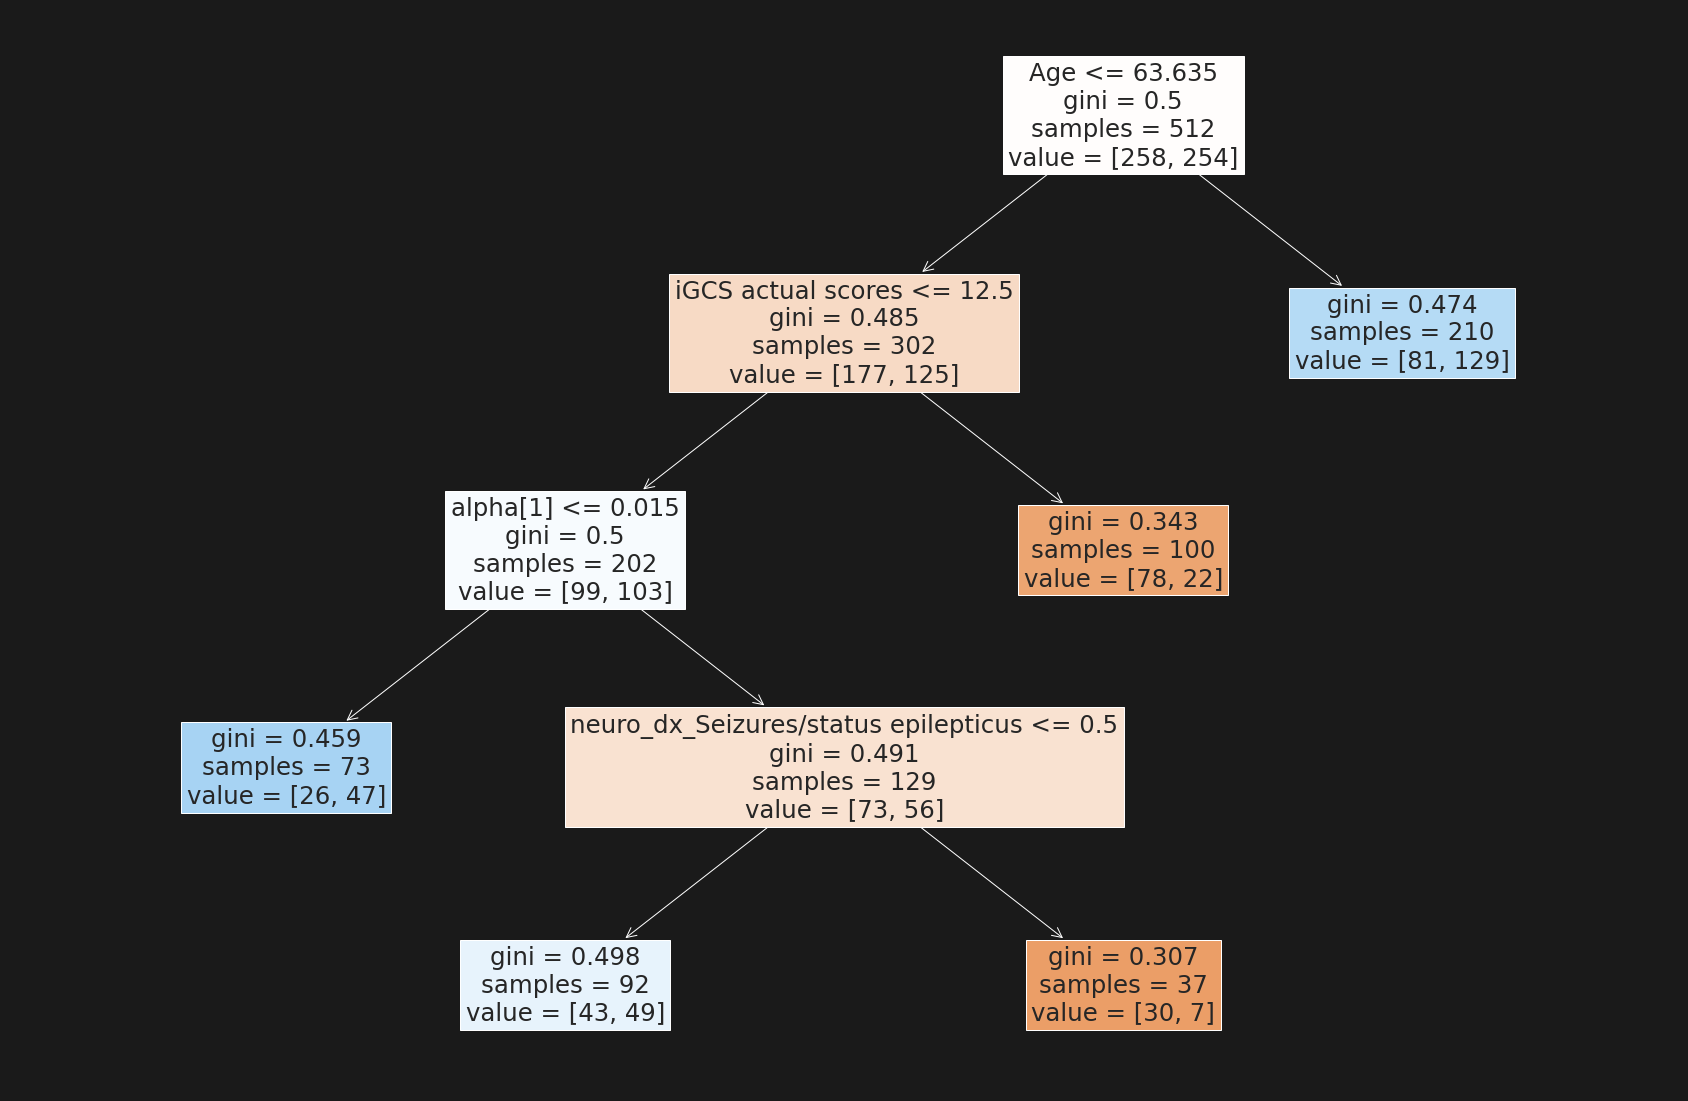

In [220]:
#Hyperparameters chosen using CV
X_train, X_test, y_train, y_test = train_test_split(thetas, Y, test_size=0.5, random_state=42)
outcome_model_full = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=0.042,max_leaf_nodes=5).fit(X_train,y_train)
print(outcome_model_full.score(X_test,y_test))
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(30,20),facecolor='k')
tree.plot_tree(outcome_model_full,feature_names=list(thetas.columns),filled=True)

0.6471734892787524


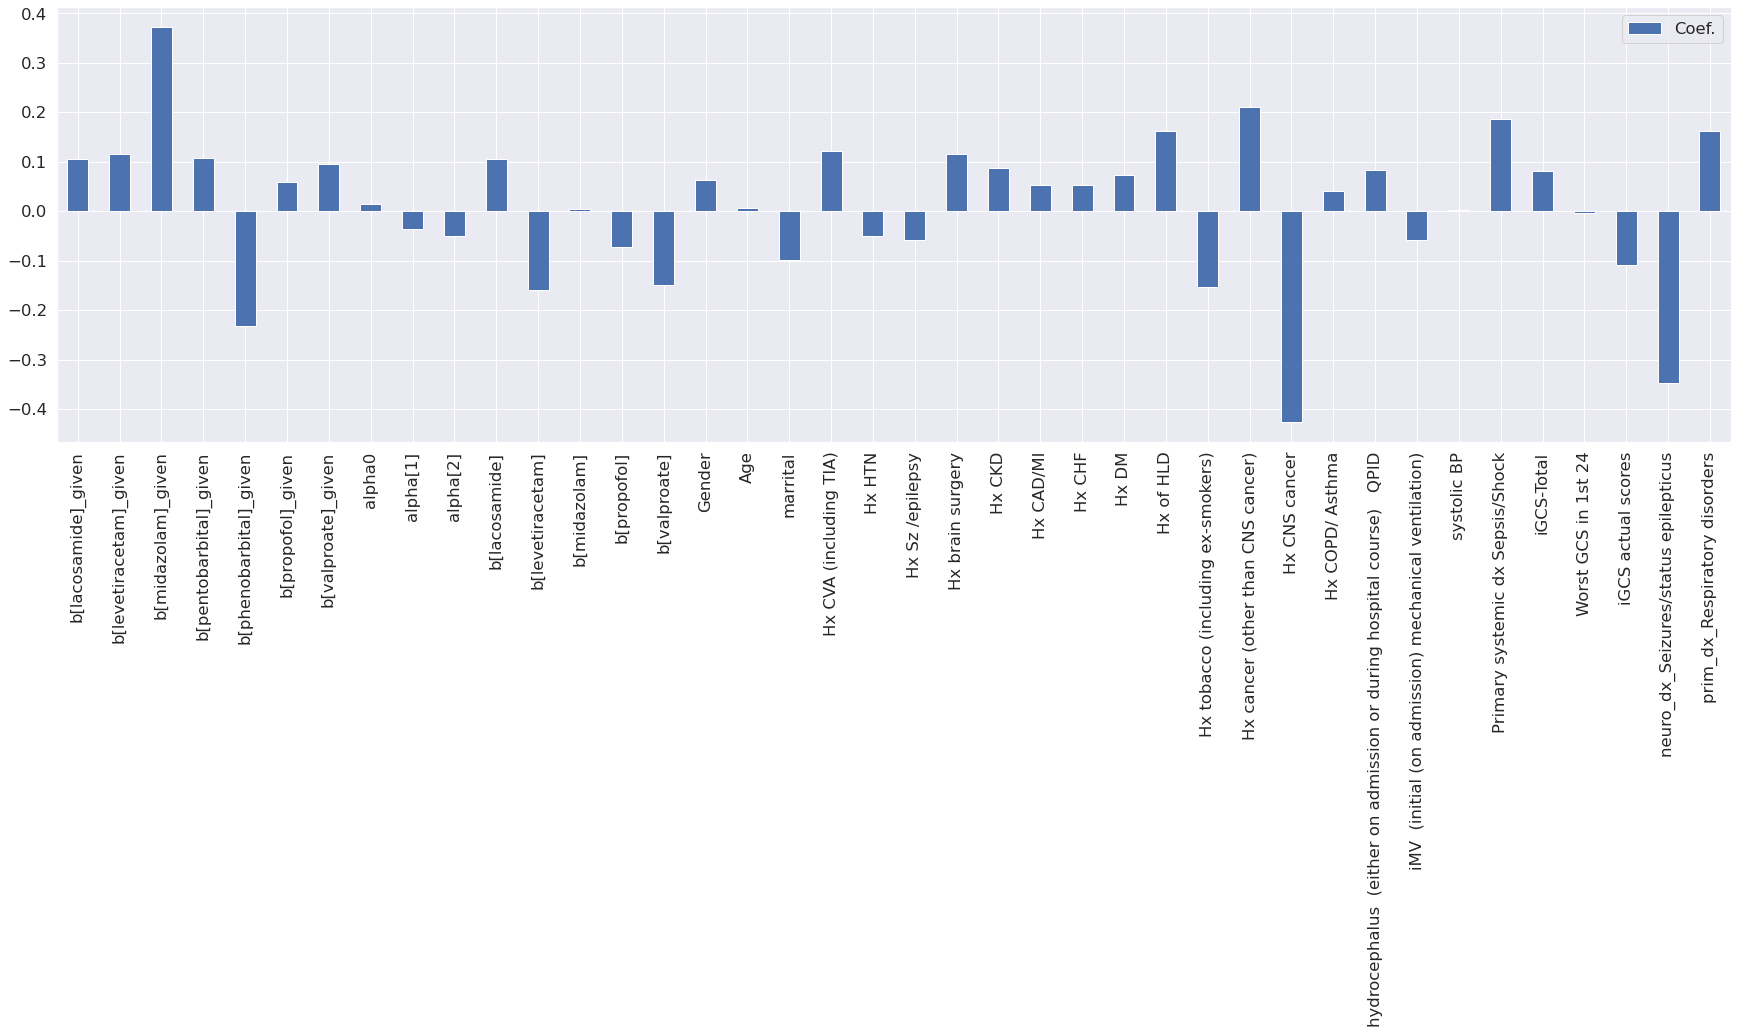

In [221]:
X_train, X_test, y_train, y_test = train_test_split(thetas, Y, test_size=0.5, random_state=42)
outcome_model_full = lm.RidgeClassifierCV(normalize=False).fit(X_train,y_train)
print(outcome_model_full.score(X_test,y_test))
sns.set(font_scale=1.5)
coef = pd.DataFrame(outcome_model_full.coef_[0],index=list(thetas.columns),columns=['Coef.'])
fig,ax = plt.subplots(figsize=(30,8))
coef.plot(kind='bar',ax=ax)

In [17]:
#why is the classifier so bad?
thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
#thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results/params_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)



thetas = theta_prime.join(thetas,lsuffix='_given')

Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) > 3).astype(int)
thetas = thetas.loc[list(Y.index)]


outcome_pred_model2 = lm.RidgeClassifierCV().fit(thetas,Y)
Y_hat = outcome_pred_model2.predict(thetas)

print(1-outcome_pred_model2.score(thetas,Y))
print(confusion_matrix(Y,Y_hat))



         DC MRS (modified ranking scale)
Index                                   
sid2                                   1
sid3                                   1
sid4                                   1
sid5                                   0
sid7                                   1
...                                  ...
sid1985                                1
sid1986                                1
sid1989                                0
sid1990                                0
sid1991                                1

[1025 rows x 1 columns]
         DC MRS (modified ranking scale)
Index                                   
sid2                                   1
sid3                                   1
sid4                                   1
sid5                                   0
sid7                                   1
...                                  ...
sid1985                                1
sid1986                                1
sid1989                         

In [12]:
#drop 4

from sklearn.metrics import confusion_matrix
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
#thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results/params_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)



thetas = theta_prime.join(thetas,lsuffix='_given')


#why is the classifier so bad?
Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
Y = Y.loc[Y['DC MRS (modified ranking scale)']!='4']
Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) >4 ).astype(int)


theta_tilde = thetas.loc[list(Y.index)]

outcome_pred_model2 = lm.RidgeClassifierCV().fit(theta_tilde,Y)
Y_hat = outcome_pred_model2.predict(theta_tilde)

print(1-outcome_pred_model2.score(theta_tilde,Y))
print(confusion_matrix(Y,Y_hat))



FileNotFoundError: [Errno 2] File b'/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv' does not exist: b'/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv'

In [332]:
#does min max scaling help?
from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler()
theta_tilde = mm_scaler.fit_transform(theta_tilde)



outcome_pred_model2 = lm.RidgeClassifierCV().fit(theta_tilde,Y)
Y_hat = outcome_pred_model2.predict(theta_tilde)

print(1-outcome_pred_model2.score(theta_tilde,Y))
print(confusion_matrix(Y,Y_hat))



0.1768901569186876
[[ 62 108]
 [ 16 515]]


In [333]:
from sklearn.model_selection import cross_val_score
from sklearn  import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, theta_tilde, Y, cv=5)
1-scores

rfc = RandomForestClassifier(n_estimators=10).fit(theta_tilde, Y)
scores = cross_val_score(rfc, theta_tilde, Y, cv=5)
1-scores





array([0.20567376, 0.2       , 0.22857143, 0.26428571, 0.17857143])

In [11]:
#How about upsampling/downsampling?

#drop 4

from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
#thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results/params_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)



thetas = theta_prime.join(thetas,lsuffix='_given')


#why is the classifier so bad?
Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
Y = Y.loc[Y['DC MRS (modified ranking scale)']!='4']
Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) >4 ).astype(int)



theta_tilde = thetas.loc[list(Y.index)]


X_train, X_test, y_train, y_test = train_test_split(theta_tilde, Y, test_size = 0.2)


X = pd.concat([X_train, y_train], axis=1)

low = X.loc[X['DC MRS (modified ranking scale)'] ==0]
high = X.loc[X['DC MRS (modified ranking scale)'] == 1]

low_upsampled = resample(low, replace= True, n_samples = len(high))

upsampled = pd.concat([high, low_upsampled])



print(upsampled['DC MRS (modified ranking scale)'].value_counts())


outcome_pred_model2 = lm.RidgeClassifierCV().fit(X_train,y_train)
Y_hat = outcome_pred_model2.predict(X_test)


print(confusion_matrix(y_test,Y_hat))


y_train = upsampled['DC MRS (modified ranking scale)']
X_train = upsampled.drop('DC MRS (modified ranking scale)', axis = 1)



outcome_pred_model_ridgelogistic = lm.RidgeClassifierCV().fit(X_train,y_train)
Y_hat = outcome_pred_model_ridgelogistic.predict(X_test)
print(confusion_matrix(y_test,Y_hat))

outcome_pred_model_tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=0.042,max_leaf_nodes=5).fit(X_train,y_train)
Y_hat = outcome_pred_model_tree.predict(X_test)
print(confusion_matrix(y_test,Y_hat))


FileNotFoundError: [Errno 2] File b'/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv' does not exist: b'/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv'

[Text(744.0, 951.3000000000001, 'Age <= 62.69\ngini = 0.5\nsamples = 856\nvalue = [428, 428]'),
 Text(372.0, 679.5, 'prim_dx_Respiratory disorders <= 0.5\ngini = 0.467\nsamples = 509\nvalue = [320, 189]'),
 Text(186.0, 407.70000000000005, 'gini = 0.414\nsamples = 393\nvalue = [278, 115]'),
 Text(558.0, 407.70000000000005, 'gini = 0.462\nsamples = 116\nvalue = [42, 74]'),
 Text(1116.0, 679.5, 'iGCS actual scores <= 10.5\ngini = 0.429\nsamples = 347\nvalue = [108, 239]'),
 Text(930.0, 407.70000000000005, 'gini = 0.289\nsamples = 177\nvalue = [31, 146]'),
 Text(1302.0, 407.70000000000005, 'Age <= 73.635\ngini = 0.496\nsamples = 170\nvalue = [77, 93]'),
 Text(1116.0, 135.89999999999998, 'gini = 0.456\nsamples = 94\nvalue = [61, 33]'),
 Text(1488.0, 135.89999999999998, 'gini = 0.332\nsamples = 76\nvalue = [16, 60]')]

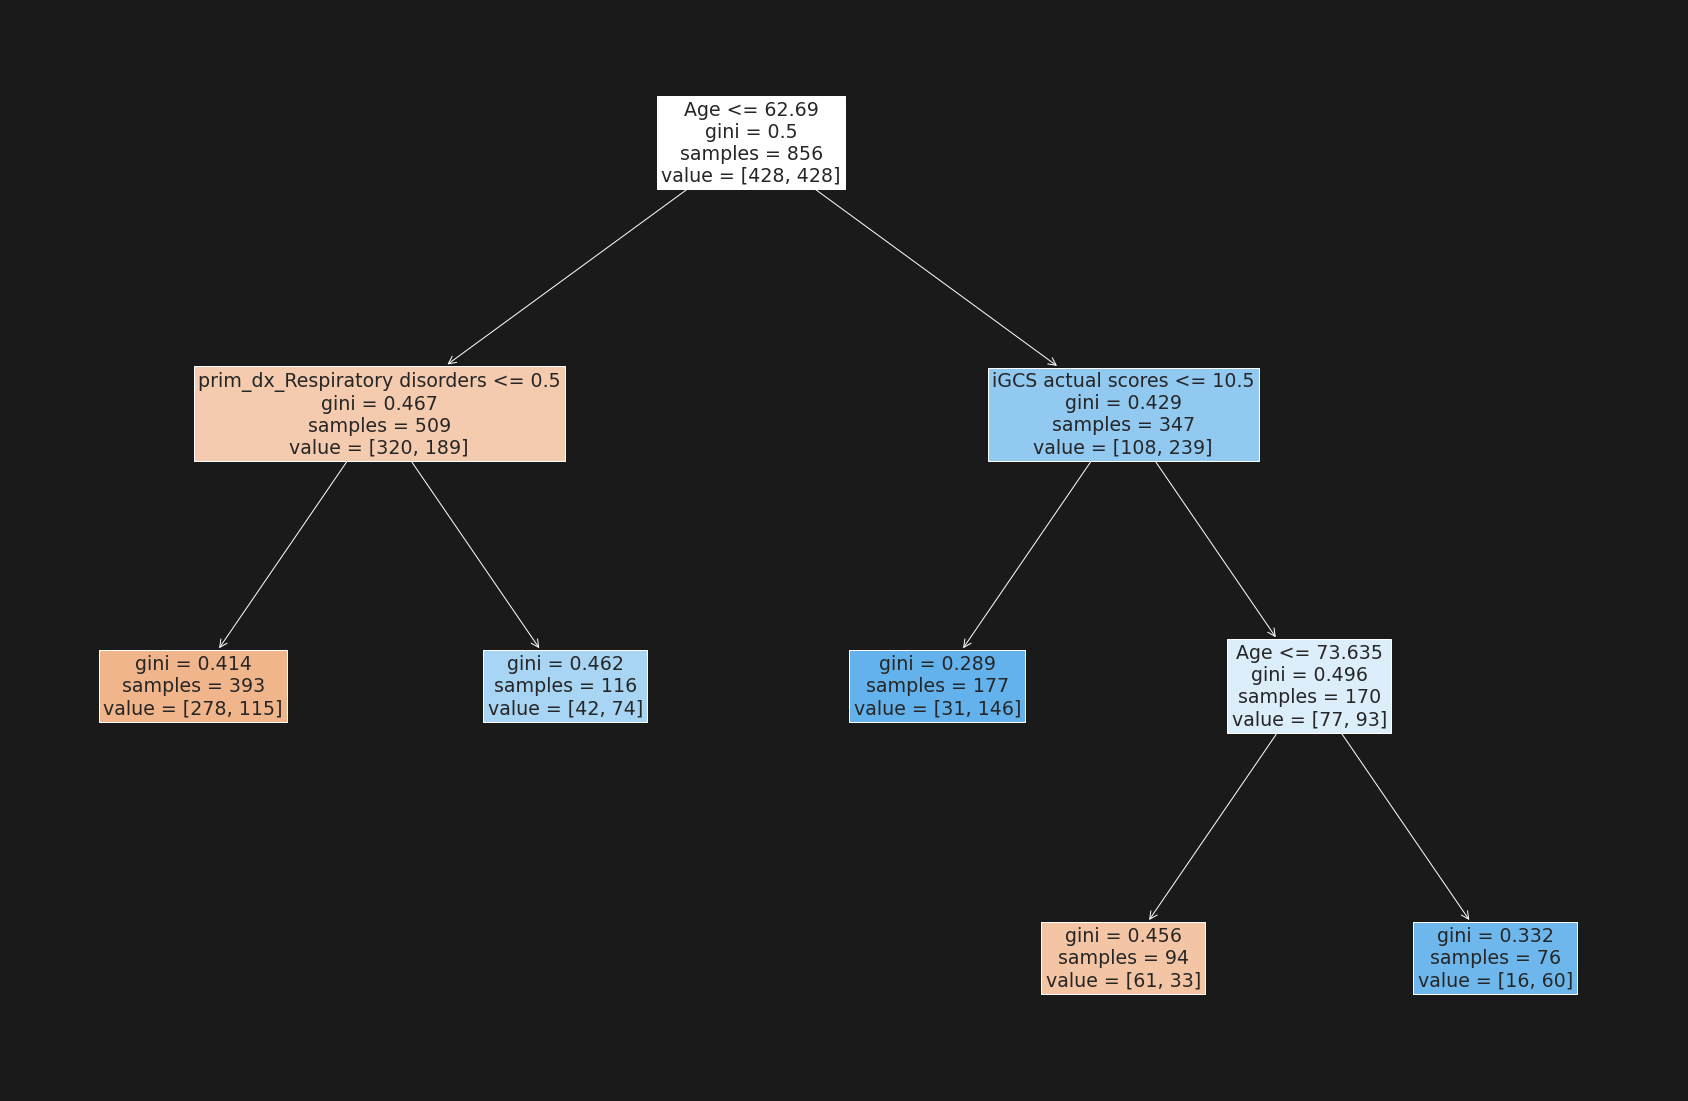

In [403]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(30,20),facecolor='k')
tree.plot_tree(outcome_pred_model_tree,feature_names=list(thetas.columns),filled=True)

0.7730496453900709


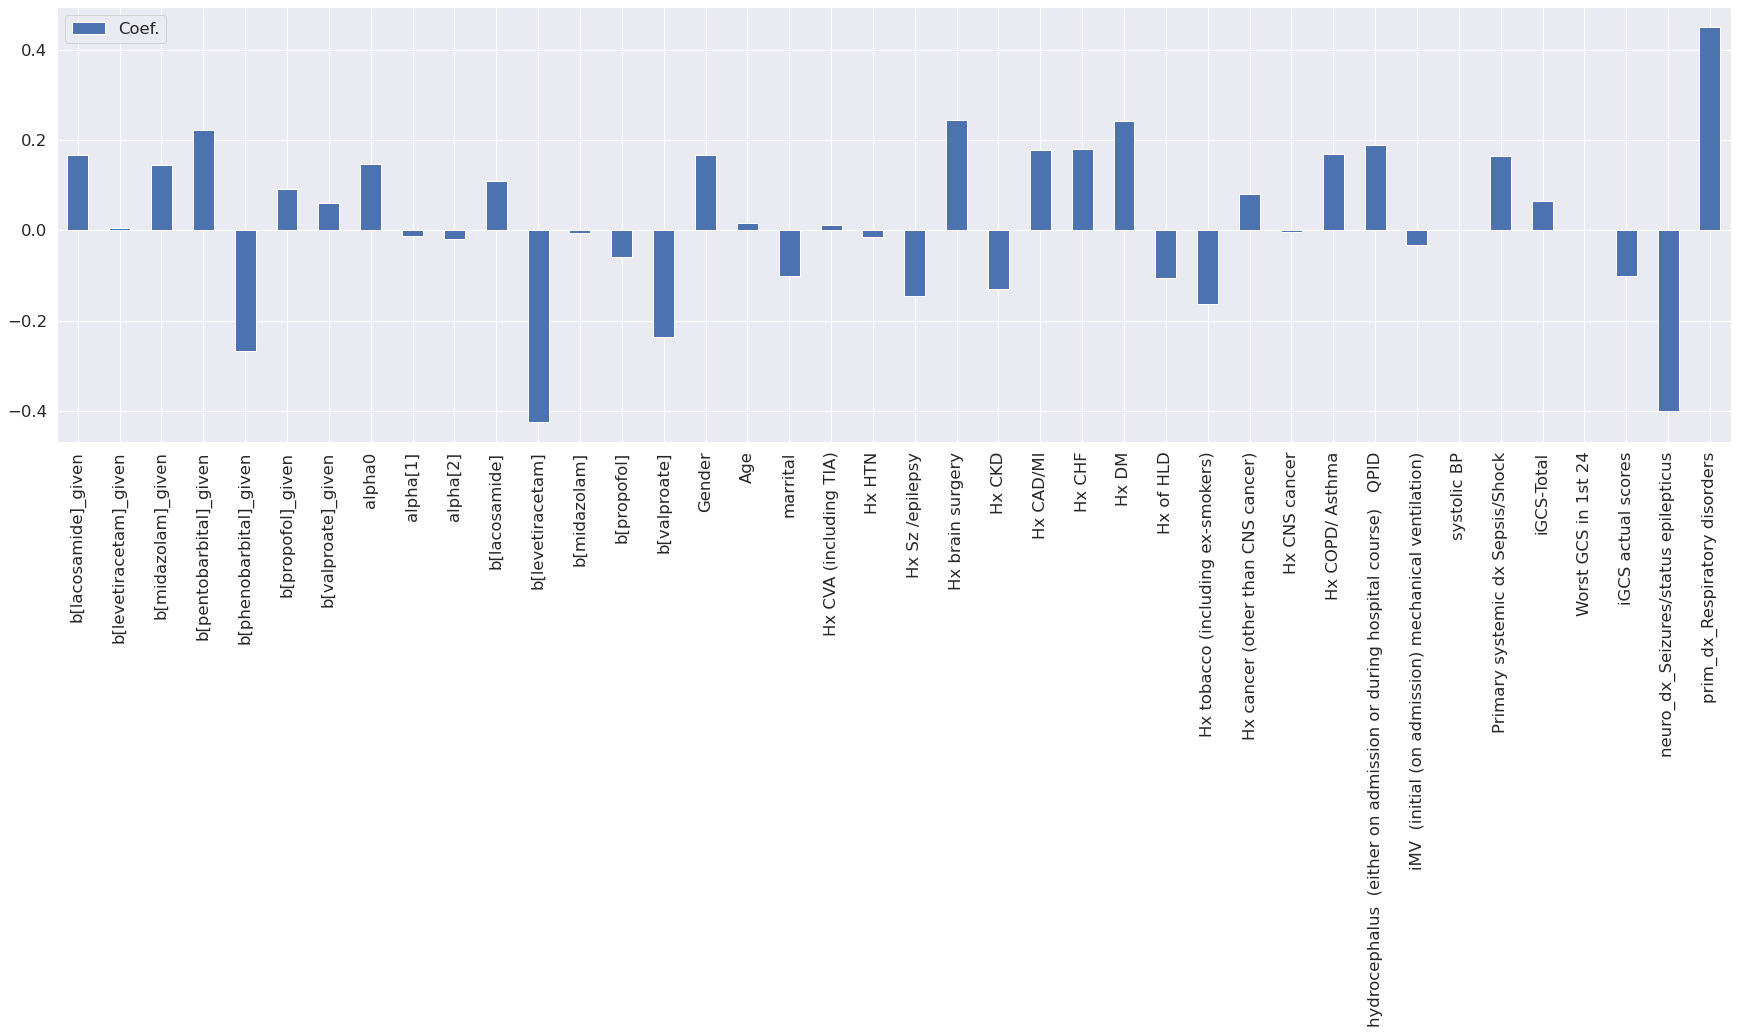

In [404]:
print(outcome_pred_model2.score(X_test,y_test))
sns.set(font_scale=1.5)
coef = pd.DataFrame(outcome_pred_model_ridgelogistic.coef_[0],index=list(thetas.columns),columns=['Coef.'])
fig,ax = plt.subplots(figsize=(30,8))
coef.plot(kind='bar',ax=ax)

In [398]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mord import LogisticAT

#why is the classifier so bad?
thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
#thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results/params_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)

#why is the classifier so bad?
Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) ).astype(int)



theta_tilde = thetas.loc[list(Y.index)]


Y = Y.to_numpy()

clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(theta_tilde, Y)


print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(theta_tilde), Y))

Y_hat = clf2.predict(theta_tilde)
print(confusion_matrix(Y,Y_hat))



Mean Absolute Error of LogisticAT 0.8721951219512195
[[  0   0   0   5  10   0   0]
 [  0   1   0   6  17   3   0]
 [  0   0   0   3  25   4   0]
 [  0   0   0   8  59  26   3]
 [  0   0   0   8 168 131  17]
 [  0   0   0   1  96 139  28]
 [  0   0   0   0  71 138  58]]


In [243]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mord import LogisticAT

#why is the classifier so bad?
thetas = pd.read_csv('/home/kentaro/github/iic_causal_inference/aim1/step4_simulator/results_iic_burden/params_std_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
#thetas = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/step4_simulator/results/params_CNNIIC_cauchy_expit_lognormal_drugoutside_ARMA2,6_iter1000.csv',index_col=0)
thetas = thetas.fillna(0)
theta_prime = (thetas[['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']]>0.001).astype(int).rename(columns={name:name+'_given' for name in ['b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[pentobarbital]','b[phenobarbital]', 'b[propofol]','b[valproate]']})
thetas = thetas[['alpha0', 'alpha[1]', 'alpha[2]',
        'b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]', 
        'Gender', 'Age',
       'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total','Worst GCS in 1st 24', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders']].fillna(0)

#why is the classifier so bad?
Y = (outcomes[['DC MRS (modified ranking scale)']].loc[list(thetas.index)])
theta_tilde = thetas.loc[Y['DC MRS (modified ranking scale)']!='4']
print(Y)
Y = Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna()
Y = Y['DC MRS (modified ranking scale)'].astype(int)
Y[Y <4] = 0
Y[Y ==4] = 1
Y[Y >4] = 2
#Y = (Y.loc[Y['DC MRS (modified ranking scale)']!='na'].dropna().astype(int) >4 ).astype(int)
print(Y)


theta_tilde = thetas.loc[list(Y.index)]


Y = Y.to_numpy()

clf2 = mord.LogisticAT(alpha=1.)
clf2.fit(theta_tilde, Y)


print('Mean Absolute Error of LogisticAT %s' %
      metrics.mean_absolute_error(clf2.predict(theta_tilde), Y))

Y_hat = clf2.predict(theta_tilde)
print(confusion_matrix(Y,Y_hat))


        DC MRS (modified ranking scale)
Index                                  
sid2                                  5
sid3                                  6
sid4                                  6
sid5                                  2
sid7                                  4
...                                 ...
sid1985                               5
sid1986                               4
sid1989                               3
sid1990                               3
sid1991                               4

[1028 rows x 1 columns]
Index
sid2       2
sid3       2
sid4       2
sid5       0
sid7       1
          ..
sid1985    2
sid1986    1
sid1989    0
sid1990    0
sid1991    1
Name: DC MRS (modified ranking scale), Length: 1025, dtype: int64
Mean Absolute Error of LogisticAT 0.48292682926829267
[[ 22 113  35]
 [  5 169 150]
 [  2 153 376]]


DC MRS (modified ranking scale)
sid2                                   1
sid3                                   1
sid4                                   1
sid5                                   0
sid7                                   0
...                                  ...
sid1985                                1
sid1986                                0
sid1989                                0
sid1990                                0
sid1991                                0

[1025 rows x 1 columns]

### Matching on C

In [14]:
C = thetas[['b[lacosamide]_given', 'b[levetiracetam]_given', 'b[midazolam]_given',
       'b[pentobarbital]_given', 'b[phenobarbital]_given', 'b[propofol]_given',
       'b[valproate]_given','Worst GCS in 1st 24','Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF']].fillna(0)

discrete=['b[lacosamide]_given', 'b[levetiracetam]_given', 'b[midazolam]_given',
       'b[pentobarbital]_given', 'b[phenobarbital]_given', 'b[propofol]_given',
       'b[valproate]_given','Worst GCS in 1st 24','Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF']

T = thetas[['iGCS-Total','alpha0', 'alpha[1]', 'alpha[2]','b[lacosamide]', 'b[levetiracetam]', 'b[midazolam]', 'b[propofol]', 'b[valproate]']]

def distance(X,discrete=[]):
    Xd = X[discrete]
    Xc = X.drop(columns=discrete)
    distc = DistanceMetric.get_metric('euclidean')
    distd = DistanceMetric.get_metric('hamming')
    _,pc = Xc.shape
    _,pd = Xd.shape
    dc, dd = 0,0
    if pc>0:
        dc = distc.pairwise(Xc)
    if pd>0:
        dd = distd.pairwise(Xd)*pd
    return (dc+dd)

dist_mat = pd.DataFrame(distance(C,discrete=discrete),index=C.index,columns=C.index)
mg = (dist_mat==0).astype(int)


In [15]:
idxs = mg.sum(axis=1).loc[mg.sum(axis=1)>10].index
idxs

Index(['sid16', 'sid40', 'sid42', 'sid50', 'sid60', 'sid80', 'sid82', 'sid88',
       'sid113', 'sid144',
       ...
       'sid1885', 'sid1888', 'sid1890', 'sid1903', 'sid1917', 'sid1918',
       'sid1951', 'sid1976', 'sid1989', 'sid1990'],
      dtype='object', name='SID', length=188)

(-0.75, 0.75)

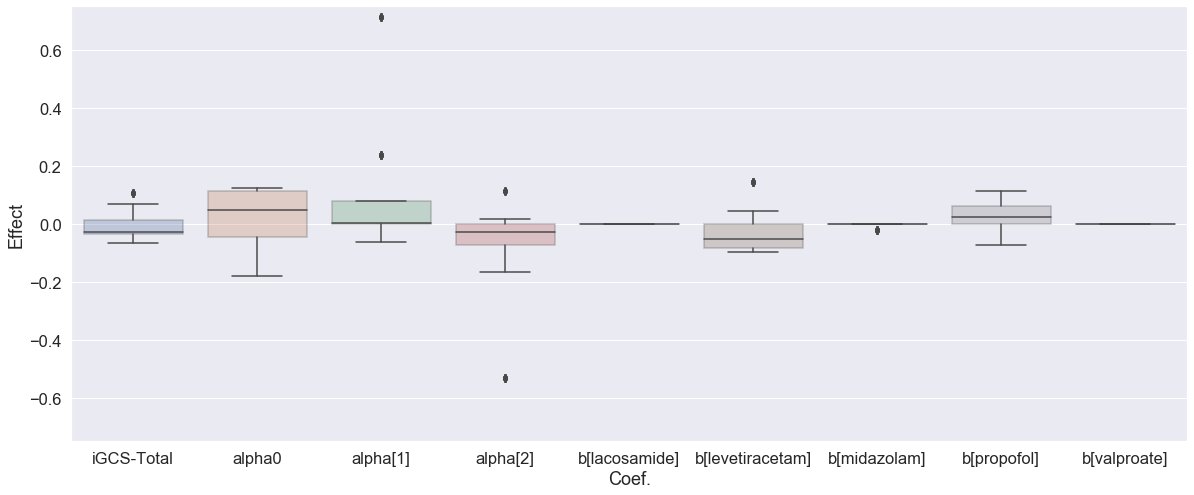

In [16]:
idxs = mg.sum(axis=1).loc[mg.sum(axis=1)>10].index

df_coef = pd.DataFrame()
for idx in idxs:
    T_neighbors = T.loc[mg.loc[idx][mg.loc[idx]>0].index]
    Y_neighbors = Y.loc[mg.loc[idx][mg.loc[idx]>0].index]
    model = lm.RidgeClassifierCV().fit(T_neighbors,Y_neighbors)
    coef = pd.DataFrame(model.coef_.reshape(1,-1),index=[idx],columns=T.columns)
    df_coef = pd.concat([df_coef,coef])
fig,ax = plt.subplots(figsize=(20,8))
# df_coef.plot(kind='box',ax=ax)
df_coef_melt = df_coef.drop(columns=[]).melt(var_name='Coef.', value_name='Effect')
sns.boxplot(x="Coef.", y="Effect", data=df_coef_melt,boxprops=dict(alpha=.3))
plt.ylim((-0.75,0.75))
# plt.plot(np.arange(1,9),df_coef.mean(axis=0))

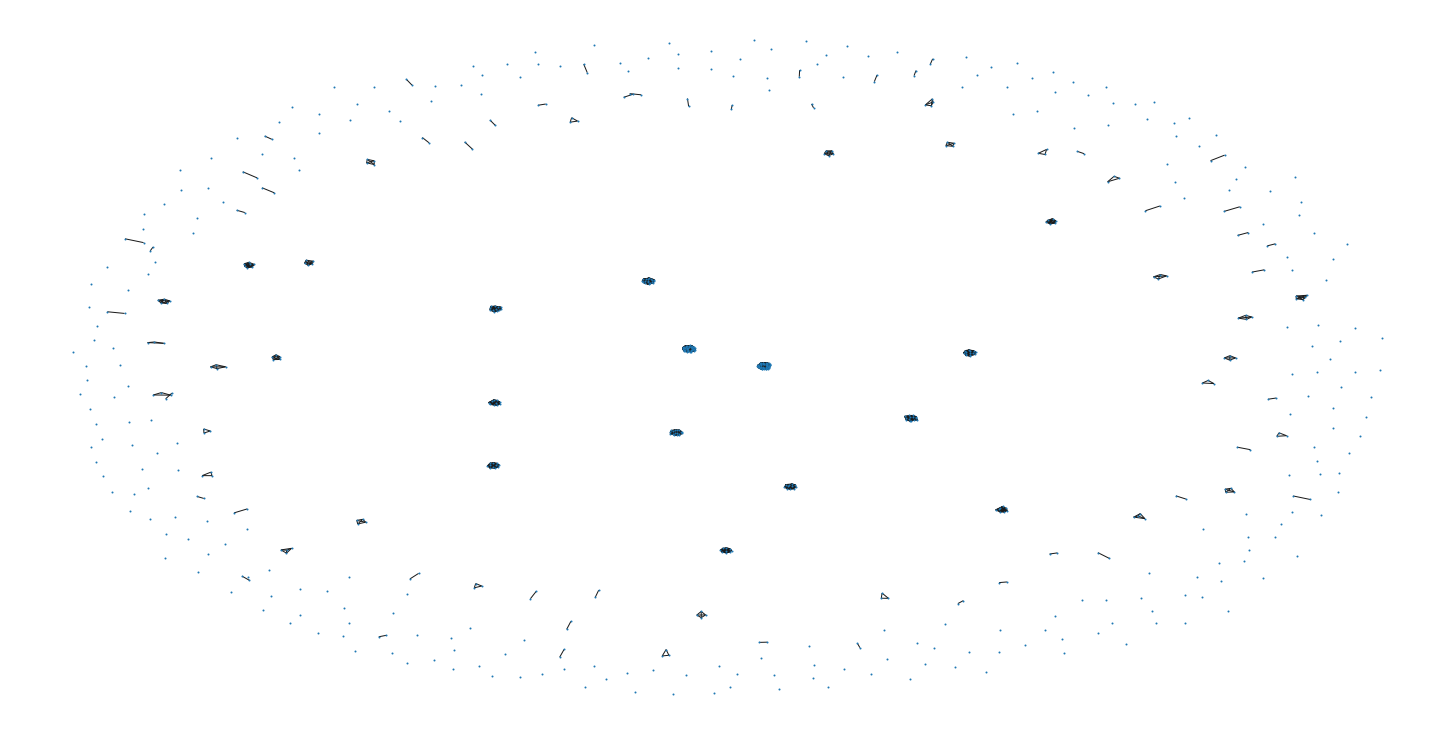

In [17]:
G = nx.from_pandas_adjacency(mg)
fig = plt.figure(figsize=(20,10))
nx.draw_spring(G,node_size=1)

In [18]:
from pyvis.network import Network

In [19]:
nt = Network(height=700,width=800,notebook=True)
nt.from_nx(G)
nt.show('G.html')

# Part-5 Descriptive Statistics 

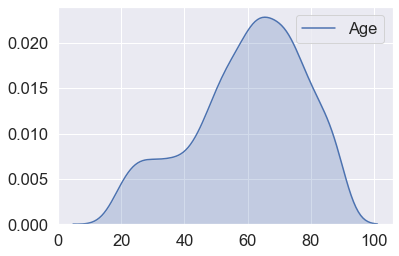

In [8]:
sns.kdeplot(covariates['Age'],shade=True)

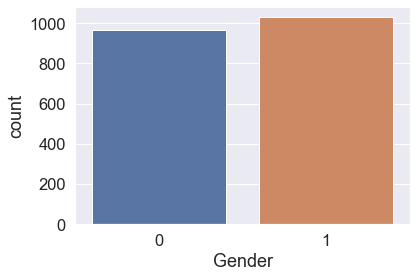

In [9]:
sns.countplot(covariates['Gender'])

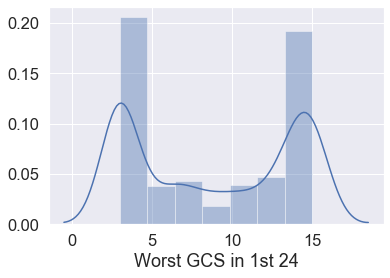

In [10]:
sns.distplot(covariates['Worst GCS in 1st 24'])

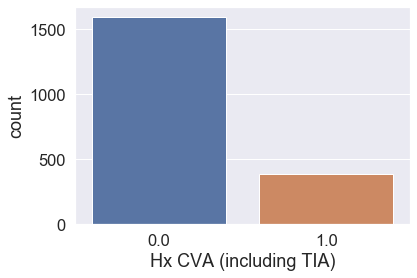

In [11]:
sns.countplot(covariates['Hx CVA (including TIA)'])

In [264]:
covariates.columns

Index(['Gender', 'Age', 'marrital', 'APACHE II  first 24',
       'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
       'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
       'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', '

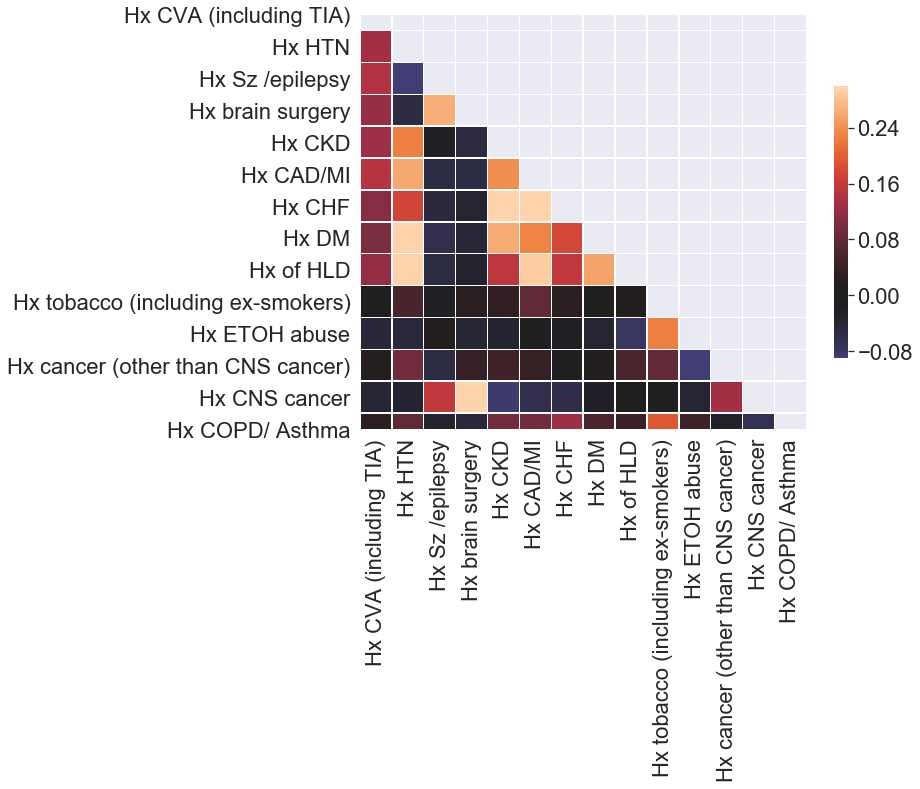

In [273]:
X = covariates[['Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
       'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
       'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma']].rename(columns={'Hx ETOH abuse any time in their life (just when in the hx is mentioned)':'Hx ETOH abuse'})
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})